<a href="https://colab.research.google.com/github/evalcas/climate-variables-senamhi-augusto-weberbauer-cajamarca-1994-2024/blob/main/Dataset_Imputation_Senamhi30Year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lisis y Evaluaci√≥n de M√©todos de Imputaci√≥n para Series Temporales de Variables Ambientales en Datos Climatol√≥gicos - Estaci√≥n Augusto Weberbauer (Cajamarca, Per√∫)

* Objetivo del Notebook: Analizar, documentar y comparar un conjunto representativo de m√©todos de imputaci√≥n, con √©nfasis en su aplicabilidad a series temporales de variables ambientales diarias de 30 a√±os

* Fuente de Datos: Los datos fueron proporcionados por el SENAMHI para la ciudad de Cajamarca en Per√∫, el periodo abarca desde enero del 1994 a diciembre del 2024.

* Variables Climatol√≥gicas Procesadas y Evaluadas:
    - **DailyPrecipitation** (precipitaci√≥n diaria)
    - **AverageTemperature** (temperatura media)
    - **RelativeHumidity** (humedad relativa)
    - **AtmosphericPressure** (presi√≥n atmosf√©rica)
    - **WindSpeed** (velocidad del viento)
    - **SunshineHours** (horas de sol)

* Repositorio y Autor√≠a:
Edwin Valencia-Castillo, & Sandra Rodriguez-Avila. (2025). Climate Variables from SENAMHI Augusto Weberbauer Station (Cajamarca, Peru), 1994‚Äì2024 (v1.1.0). Zenodo. https://doi.org/10.5281/zenodo.15803715

## Introducci√≥n

La calidad de los datos es fundamental en el an√°lisis de series temporales ambientales. Sin embargo, en muchas ocasiones, los registros clim√°ticos y meteorol√≥gicos presentan vac√≠os de informaci√≥n debidos a fallas en los sensores, problemas log√≠sticos, errores humanos o eventos extraordinarios como desastres naturales o pandemias. En este contexto, la **imputaci√≥n de datos faltantes** se vuelve una tarea cr√≠tica para garantizar la integridad de los an√°lisis posteriores.

## Estructura del An√°lisis

Se ha identificado varios m√©todos de imputacion aplicables a variables ambientales, estos son:

| M√©todo                                | Definici√≥n B√°sica                                                                                                                                                                                                                                 |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Media estacional**                  | Sustituye valores faltantes con la media calculada para cada categor√≠a estacional (por ejemplo, mes o d√≠a del a√±o), preservando la estacionalidad anual en la serie.                                                                              |
| **Interpolaci√≥n estacional**          | Estima los valores faltantes mediante interpolaci√≥n (lineal, c√∫bica, spline, etc.) dentro de cada categor√≠a estacional, respetando la estructura temporal repetitiva.                                                                             |
| **STL con interpolaci√≥n**             | Descompone la serie en componentes de tendencia, estacionalidad y residuo mediante el algoritmo STL (*Seasonal-Trend decomposition using Loess*) e interpola solo la parte residual para evitar distorsionar la estacionalidad.                   |
| **KNN con estacionalidad**            | Imputa cada valor faltante usando un promedio ponderado de los *k* vecinos m√°s cercanos en el espacio multivariable, considerando √∫nicamente aquellos que pertenecen a la misma categor√≠a estacional.                                             |
| **MICE con estacionalidad**           | M√©todo iterativo de imputaci√≥n multivariable que modela cada variable con datos faltantes en funci√≥n de las dem√°s, incluyendo indicadores estacionales como variables predictoras en cada modelo.                                                 |
| **An√°lisis Espectral Singular (SSA)** | Descompone la serie temporal en componentes principales (tendencia, oscilaciones peri√≥dicas y ruido) mediante t√©cnicas espectrales; reconstruye la se√±al eliminando el ruido y sustituyendo los valores faltantes con la reconstrucci√≥n estimada. |
| **Regresi√≥n temporal**                | Ajusta un modelo de regresi√≥n univariado o multivariado, en funci√≥n del tiempo y/o de otras variables predictoras, para estimar los valores faltantes siguiendo la evoluci√≥n de la serie.                                                         |

---

## Enfoque de Evaluaci√≥n

Luego de la descripci√≥n de cada uno de los m√©todos y su fundamento te√≥rico, se desarrollar√° una **evaluaci√≥n comparativa integral**, sustentada en un enfoque estad√≠stico y estructural. Para ello, se implementar√°n las siguientes m√©tricas de evaluaci√≥n:

- **Diferencias estad√≠sticas**: Comparaci√≥n de medidas de tendencia central (media), dispersi√≥n (desviaci√≥n est√°ndar), simetr√≠a y curtosis entre la serie original y la imputada.
- **Din√°mica temporal**: An√°lisis de similitud en la evoluci√≥n de la serie imputada respecto al comportamiento temporal original.
- **Estructura y complejidad temporal**: Medidas basadas en t√©cnicas de an√°lisis de recurrencia, entrop√≠a o autocorrelaci√≥n para evaluar la preservaci√≥n de la complejidad intr√≠nseca de la serie.
- **Conservaci√≥n de eventos extremos**: Evaluaci√≥n de la capacidad del m√©todo para no distorsionar ni suavizar excesivamente eventos at√≠picos o extremos importantes desde el punto de vista ambiental.

---

## Resultado Esperado

Como resultado del an√°lisis, se identificar√° el o los **m√©todos de imputaci√≥n m√°s apropiados para cada variable ambiental**, considerando su comportamiento estad√≠stico y estructura temporal caracter√≠stica. Esta selecci√≥n se basar√° en evidencia emp√≠rica y respaldo bibliogr√°fico, garantizando un enfoque riguroso y reproducible para futuras aplicaciones en el contexto de climatolog√≠a, hidrolog√≠a y otras ciencias ambientales.


In [156]:
# ================================
# Manejo de advertencias
# ================================
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# ================================
# Manipulaci√≥n y procesamiento de datos
# ================================
import pandas as pd
import numpy as np
import time

# ================================
# Visualizaci√≥n de datos
# ================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# Solo en Jupyter o Colab

# ================================
# Imputaci√≥n y preprocesamiento
# ================================
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder

# ================================
# Modelado estad√≠stico y regresi√≥n
# ================================
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor

# ================================
# Series temporales y descomposici√≥n
# ================================
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

# ================================
# M√©todos espectrales y SSA
# ================================
from scipy.linalg import svd
from pyts.decomposition import SingularSpectrumAnalysis

# ================================
# Estad√≠sticas avanzadas y entrop√≠a
# ================================
from scipy.stats import kurtosis, skew, entropy
from antropy import sample_entropy, app_entropy
from pyunicorn.timeseries import RecurrencePlot

# ================================
# Evaluaci√≥n de modelos
# ================================
from sklearn.metrics import mean_absolute_error

# Ignora espec√≠ficamente las advertencias de tipo FutureWarning que podr√≠an aparecer al utilizar funciones
# que cambiar√°n en versiones futuras de bibliotecas como pandas o numpy.
warnings.filterwarnings("ignore", category=FutureWarning)

In [157]:
# URL del archivo Excel en GitHub

url = 'https://github.com/evalcas/climate-variables-senamhi-augusto-weberbauer-cajamarca-1994-2024/blob/main/dataset_preprocessed_senamhi30Year.xlsx?raw=true'
excel_file = url

df_procesado = pd.read_excel(excel_file)

In [158]:
print(df_procesado.head())

  ProcessDate  Year  Month  Day  DailyPrecipitation  AverageTemperature  \
0  1994-01-01  1994      1    1                 0.2                14.9   
1  1994-01-02  1994      1    2                 7.7                15.1   
2  1994-01-03  1994      1    3                 0.0                14.0   
3  1994-01-04  1994      1    4                 0.0                15.3   
4  1994-01-05  1994      1    5                 5.1                15.1   

   RelativeHumidity  AtmosphericPressure  WindSpeed  SunshineHours  
0              76.2                740.1        1.3            6.8  
1              77.8                739.9        1.3            1.6  
2              73.1                739.5        1.7            6.8  
3              66.9                740.2        NaN            3.5  
4              72.0                740.1        2.0            6.2  


In [159]:
# usando df_procesado creamos un indice fecha utilizando la columna ProcessDate
# se verifica que no haya fechas faltantes, si los hay se visualizan
# luego se muestra los datos faltantes del df_procesado

# Establecer 'ProcessDate' como √≠ndice
df_procesado = df_procesado.set_index('ProcessDate')

# Verificar fechas faltantes
fechas_minima = df_procesado.index.min()
fechas_maxima = df_procesado.index.max()

rango_fechas = pd.date_range(start=fechas_minima, end=fechas_maxima)
fechas_faltantes = rango_fechas.difference(df_procesado.index)

if not fechas_faltantes.empty:
  print("Fechas faltantes:")
  print(fechas_faltantes)
else:
  print("No hay fechas faltantes en el DataFrame.")

# Mostrar datos faltantes en el DataFrame
print("\nDatos faltantes en df_procesado:")
print(df_procesado.isna().sum())

No hay fechas faltantes en el DataFrame.

Datos faltantes en df_procesado:
Year                      0
Month                     0
Day                       0
DailyPrecipitation      137
AverageTemperature      396
RelativeHumidity        508
AtmosphericPressure     327
WindSpeed              1288
SunshineHours           163
dtype: int64


In [160]:
# muestra informacion de los valores faltantes relacionados a su proporcion y distribucion expresado en porcentaje de la variables del dataset df_procesado

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = df_procesado.isnull().sum() * 100 / len(df_procesado)

# Crear un DataFrame para mostrar la informaci√≥n
missing_info = pd.DataFrame({
    'Variable': missing_percentage.index,
    'Missing count': df_procesado.isnull().sum().values,
    'Missing percentage': missing_percentage.values
})

# Ordenar por porcentaje de valores faltantes (de mayor a menor)
missing_info = missing_info.sort_values(by='Missing percentage', ascending=False)

# Mostrar la informaci√≥n
missing_info


Variable  Missing count  Missing percentage
7            WindSpeed           1288           11.375077
5     RelativeHumidity            508            4.486444
4   AverageTemperature            396            3.497306
6  AtmosphericPressure            327            2.887927
8        SunshineHours            163            1.439548
3   DailyPrecipitation            137            1.209927
0                 Year              0            0.000000
1                Month              0            0.000000
2                  Day              0            0.000000

In [161]:
df_procesado.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11323 entries, 1994-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 11323 non-null  int64  
 1   Month                11323 non-null  int64  
 2   Day                  11323 non-null  int64  
 3   DailyPrecipitation   11186 non-null  float64
 4   AverageTemperature   10927 non-null  float64
 5   RelativeHumidity     10815 non-null  float64
 6   AtmosphericPressure  10996 non-null  float64
 7   WindSpeed            10035 non-null  float64
 8   SunshineHours        11160 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 884.6 KB


In [27]:
# pip install pyts instalarlo en el terminal desde el venv

In [164]:


# ===============================
# METODOS DEIMPUTACI√ìN DE DATOS AMBIENTALES IMPLEMENTADOS
# ===============================

# ===============================
# PAQUETES
# ===============================

# ============================================
# N√∫cleo cient√≠fico y manipulaci√≥n de datos
# ============================================
import numpy as np
import pandas as pd
import time

# ===============================
# Visualizaci√≥n de datos
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# Manejo de advertencias
# ================================
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# =============================================
# Imputaci√≥n de datos y preprocesamiento
# =============================================
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import (
    KNNImputer,
    IterativeImputer,
    SimpleImputer
)

from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    OneHotEncoder
)

# ============================================
# Modelado estad√≠stico y regresi√≥n
# ============================================
from sklearn.linear_model import (
    LinearRegression,
    BayesianRidge,
    Ridge
)

from sklearn.neighbors import KNeighborsRegressor

# ================================================
# Series temporales y descomposici√≥n estacional
# ================================================
from statsmodels.tsa.seasonal import STL, seasonal_decompose

# ============================================
# √Ålgebra lineal y m√©todos espectrales
# ============================================
from scipy.linalg import svd
from pyts.decomposition import SingularSpectrumAnalysis

# Instala la librer√≠a de SSA si no la tienes
# !pip install pyts

# ===============================
# M√âTODOS DE IMPUTACI√ìN
# ===============================

def media_estacional(df, columnas):
    """
    Imputa valores faltantes usando la media estacional (promedio por mes y d√≠a).
    
    Par√°metros:
    -----------
    df : pd.DataFrame
        DataFrame original con columnas 'Year', 'Month', 'Day' y un √≠ndice de fecha llamado 'ProcessDate'.
    columnas : list of str
        Lista de nombres de columnas a imputar.
    
    Retorna:
    --------
    df_imputado : pd.DataFrame
        Copia del DataFrame con los valores imputados.
    
    """
    df_imputado = df.copy()
    
    for col in columnas:
        # Agrupar por estacionalidad: mes y d√≠a
        for (m, d), grupo in df.groupby(['Month', 'Day']):
            # Calcular la media estacional ignorando los NaN
            media = grupo[col].mean(skipna=True)
            
            # Crear m√°scara para ubicar valores faltantes en esa categor√≠a estacional
            mask = (df['Month'] == m) & (df['Day'] == d) & (df[col].isna())
            
            # Asignar la media estacional a los valores faltantes
            df_imputado.loc[mask, col] = media
            
    return df_imputado


def interpolacion_estacional(df, columnas, metodo='linear'):
    """
    Imputa valores faltantes usando interpolaci√≥n estacional (por mes y d√≠a).
    
    Par√°metros:
    -----------
    df : pd.DataFrame
        DataFrame original con columnas 'Year', 'Month', 'Day' y un √≠ndice datetime llamado 'ProcessDate'.
    columnas : list of str
        Lista de nombres de columnas a imputar.
    metodo : str
        M√©todo de interpolaci√≥n a aplicar ('linear', 'spline', 'polynomial', etc.).
        
    Retorna:
    --------
    df_imputado : pd.DataFrame
        Copia del DataFrame con los valores imputados.
    """
    df_imputado = df.copy()
    
    for col in columnas:
        # Agrupaci√≥n por estacionalidad (mes y d√≠a)
        for (m, d), grupo in df.groupby(['Month', 'Day']):
            # Extraer el subconjunto estacional
            subgrupo = grupo[[col]].copy()
            
            # Solo si hay al menos 2 datos no nulos se puede interpolar
            if subgrupo[col].notna().sum() >= 2:
                # Interpolar valores dentro del subconjunto usando el √≠ndice de fechas
                interpolado = subgrupo[col].interpolate(method=metodo, limit_direction='both')
                
                # Actualizar solo los valores faltantes en el DataFrame original
                mask = (df['Month'] == m) & (df['Day'] == d) & (df[col].isna())
                df_imputado.loc[mask, col] = interpolado.loc[mask]
    
    return df_imputado


def stl_interpolacion(df, columnas, periodo=365, metodo='linear'):
    """
    Imputa valores faltantes utilizando la descomposici√≥n STL seguida de interpolaci√≥n de la componente residual.
    
    Par√°metros:
    -----------
    df : pd.DataFrame
        DataFrame original con un √≠ndice datetime llamado 'ProcessDate'.
    columnas : list of str
        Lista de nombres de columnas a imputar.
    periodo : int
        Periodo estacional de la serie (e.g., 365 para series diarias con estacionalidad anual).
    metodo : str
        M√©todo de interpolaci√≥n a aplicar sobre los residuos ('linear', 'spline', 'polynomial', etc.).
    
    Retorna:
    --------
    df_imputado : pd.DataFrame
        Copia del DataFrame con las variables imputadas mediante STL + interpolaci√≥n.
    
    """
    df_imputado = df.copy()
    
    for col in columnas:
        serie = df[col]
        
        # Asegurarse de que la serie tenga √≠ndice datetime
        if not isinstance(df.index, pd.DatetimeIndex):
            raise ValueError("El DataFrame debe estar indexado por fechas (DatetimeIndex).")
        
        # STL requiere series completas sin huecos, se rellena temporalmente para descomponer
        serie_temp = serie.copy()
        serie_temp = serie_temp.interpolate(method='linear', limit_direction='both')

        # Aplicar STL
        stl = STL(serie_temp, period=periodo, robust=True)
        result = stl.fit()
        
        tendencia = result.trend
        estacional = result.seasonal
        residuo = serie - tendencia - estacional  # Residuo real (puede contener NaNs)
        
        # Interpolaci√≥n del residuo
        residuo_interp = residuo.interpolate(method=metodo, limit_direction='both')
        
        # Reconstruir la serie imputada
        serie_imputada = tendencia + estacional + residuo_interp
        
        # Reemplazar solo los valores faltantes en la serie original
        df_imputado[col] = serie.where(serie.notna(), serie_imputada)
        
    return df_imputado

def knn_estacional(df, columnas, k=5, estacionalidad='DayOfYear', variables_auxiliares=None):
    """
    Imputaci√≥n basada en KNN considerando estacionalidad (e.g., por d√≠a del a√±o).

    Par√°metros:
    ----------
    df : pd.DataFrame
        DataFrame con las columnas 'Year', 'Month', 'Day' y variables a imputar.
    columnas : list of str
        Nombres de las columnas con valores faltantes que se desean imputar.
    k : int
        N√∫mero de vecinos a considerar para KNN.
    estacionalidad : str
        Nombre de la columna que define la estacionalidad (por defecto: 'DayOfYear').
    variables_auxiliares : list of str or None
        Variables auxiliares para usar como predictores junto a cada variable objetivo. Si es None, usa todas las columnas.

    Retorna:
    -------
    df_imputado : pd.DataFrame
        DataFrame con los valores imputados usando KNN por grupo estacional.
    """

    df_imputado = df.copy()

    # Verifica y crea la columna estacional si no existe
    if estacionalidad == 'DayOfYear' and 'DayOfYear' not in df_imputado.columns:
        df_imputado['DayOfYear'] = pd.to_datetime(
            df_imputado[['Year', 'Month', 'Day']]
        ).dt.dayofyear

    for col in columnas:
        # Selecciona las variables auxiliares, excluyendo la variable actual
        predictores = [col]
        if variables_auxiliares:
            predictores += [v for v in variables_auxiliares if v != col]
        predictores = list(dict.fromkeys(predictores))  # Elimina duplicados conservando orden

        df_temp = df_imputado[predictores + [estacionalidad]].copy()

        # Imputaci√≥n por grupo estacional
        for d, grupo in df_temp.groupby(estacionalidad):
            subgrupo = grupo[predictores]

            # Omitir si todos los valores est√°n vac√≠os en la variable objetivo
            if subgrupo[col].isna().all():
                continue

            # Aplica KNN solo si hay valores observados
            try:
                imputer = KNNImputer(n_neighbors=k)
                imputado = imputer.fit_transform(subgrupo)

                # Actualiza los valores imputados
                df_imputado.loc[grupo.index, col] = imputado[:, 0]
            except Exception as e:
                print(f"[Aviso] No se pudo imputar para {col} en {estacionalidad}={d}: {e}")

    return df_imputado


def mice_con_estacionalidad(df, columnas, estacionalidad='DayOfYear', n_iter=10, correl_threshold=0.3, min_aux=1):
    """
    Imputaci√≥n robusta con MICE considerando estacionalidad, con imputaci√≥n global de respaldo.
    
    Par√°metros:
    -----------
    df : pd.DataFrame
        DataFrame original con variables ambientales y columnas 'Year', 'Month', 'Day'.
    columnas : list of str
        Nombres de columnas objetivo para imputar.
    estacionalidad : str
        Estacionalidad a considerar: 'DayOfYear' o 'Month'.
    n_iter : int
        N√∫mero de iteraciones para el imputador MICE.
    correl_threshold : float
        Umbral de correlaci√≥n m√≠nima para seleccionar variables auxiliares.
    min_aux : int
        N√∫mero m√≠nimo de variables auxiliares requeridas por estaci√≥n.

    Retorna:
    --------
    df_resultado : pd.DataFrame
        Copia del DataFrame original con las imputaciones aplicadas.
    """
    from sklearn.linear_model import BayesianRidge
    from sklearn.impute import IterativeImputer
    from sklearn.preprocessing import RobustScaler

    df_resultado = df.copy()

    # Crear columna de estacionalidad si no existe
    if estacionalidad == 'DayOfYear':
        if 'DayOfYear' not in df_resultado.columns:
            df_resultado['DayOfYear'] = pd.to_datetime(df_resultado[['Year', 'Month', 'Day']]).dt.dayofyear
        grupo_estacional = 'DayOfYear'
    elif estacionalidad == 'Month':
        grupo_estacional = 'Month'
    else:
        raise ValueError("Estacionalidad no v√°lida. Use 'DayOfYear' o 'Month'.")

    for var in columnas:
        if df_resultado[var].isna().sum() == 0:
            print(f"'{var}' no tiene valores faltantes. Se omite imputaci√≥n.")
            continue

        sub_df = df_resultado[columnas + [grupo_estacional]].copy()
        aux_por_estacion = {}

        for estacion in sub_df[grupo_estacional].dropna().unique():
            sub_e = sub_df[sub_df[grupo_estacional] == estacion].dropna()
            if len(sub_e) < 10:
                continue

            corr = sub_e.corr(numeric_only=True)
            if var in corr.columns:
                correladas = corr[var].drop(var).abs()
                aux_vars = correladas[correladas >= correl_threshold].index.tolist()
                if len(aux_vars) >= min_aux:
                    aux_por_estacion[estacion] = aux_vars

        imputados_idx = []

        # Imputaci√≥n por estaci√≥n
        for estacion, aux_vars in aux_por_estacion.items():
            df_estacion = df_resultado[df_resultado[grupo_estacional] == estacion]
            if len(aux_vars) == 0 or df_estacion[var].isna().sum() == 0:
                continue

            columnas_modelo = [var] + aux_vars
            df_temp = df_estacion[columnas_modelo].copy()

            # Evitar columnas totalmente faltantes
            if df_temp.dropna().shape[0] < 10:
                continue

            scaler = RobustScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df_temp), columns=columnas_modelo, index=df_temp.index)

            imputador = IterativeImputer(estimator=BayesianRidge(), max_iter=n_iter, random_state=42)
            df_imputado = imputador.fit_transform(df_scaled)

            df_imputado = pd.DataFrame(df_imputado, columns=columnas_modelo, index=df_temp.index)
            imputacion_final = scaler.inverse_transform(df_imputado)

            df_resultado.loc[df_temp.index, var] = imputacion_final[:, 0]
            imputados_idx.extend(df_temp.index.tolist())

        # Imputaci√≥n global complementaria (solo sobre faltantes)
        faltantes_post_estacional = df_resultado[var].isna()
        if faltantes_post_estacional.sum() > 0:
            aux_global = []
            sub_corr = df_resultado[columnas].dropna().corr()
            if var in sub_corr.columns:
                correladas = sub_corr[var].drop(var).abs()
                aux_global = correladas[correladas >= correl_threshold].index.tolist()

            if len(aux_global) >= min_aux:
                columnas_modelo = [var] + aux_global
                df_temp = df_resultado.loc[faltantes_post_estacional, columnas_modelo].copy()
                df_total = df_resultado[columnas_modelo].copy()

                # Reentrenar sobre todo el conjunto
                scaler = RobustScaler()
                df_scaled = pd.DataFrame(scaler.fit_transform(df_total), columns=columnas_modelo, index=df_total.index)

                imputador = IterativeImputer(estimator=BayesianRidge(), max_iter=n_iter, random_state=42)
                imputador.fit(df_scaled)

                # Solo aplicar a faltantes
                df_pred = df_resultado.loc[faltantes_post_estacional, columnas_modelo]
                df_pred_scaled = pd.DataFrame(scaler.transform(df_pred), columns=columnas_modelo, index=df_pred.index)
                imputado = imputador.transform(df_pred_scaled)

                imputacion_final = scaler.inverse_transform(imputado)
                df_resultado.loc[df_pred.index, var] = imputacion_final[:, 0]

        # Reporte
        #faltantes_final = df_resultado[var].isna().sum()
        #imputados = df[var].isna().sum() - faltantes_final
        #print(f"  {var}: {imputados} imputados, {faltantes_final} a√∫n faltantes")

    return df_resultado

def imputacion_ssa(df, columnas, L=365, k_max=10):
    """
    Imputaci√≥n de datos faltantes mediante An√°lisis Espectral Singular (SSA).

    Par√°metros:
    -----------
    df : pd.DataFrame
        DataFrame con series temporales indexadas por fecha y columnas 'Year', 'Month', 'Day'.
    columnas : list of str
        Columnas a imputar mediante SSA.
    L : int
        Longitud de la ventana de descomposici√≥n (debe cumplir 2 ‚â§ L ‚â§ N/2). Idealmente ‚âà estacionalidad (e.g., 365).
    k_max : int
        N√∫mero m√°ximo de componentes singulares a retener para reconstrucci√≥n (SSA truncado).

    Retorna:
    --------
    df_resultado : pd.DataFrame
        DataFrame con imputaciones aplicadas por SSA a cada variable.
    """
    df_resultado = df.copy()

    for var in columnas:
        #print(f"\n Imputando '{var}' mediante SSA...")

        serie_original = df_resultado[var].values.astype(float)
        nan_mask = np.isnan(serie_original)

        if not nan_mask.any():
            print(f"'{var}' no contiene valores faltantes.")
            continue

        N = len(serie_original)
        if L >= N // 2:
            L = N // 3  # Ajustar L si es muy grande

        K = N - L + 1

        # Paso 1: completar con media estacional previa (inicializaci√≥n)
        serie_aux = serie_original.copy()
        mean_value = np.nanmean(serie_aux)
        serie_aux[nan_mask] = mean_value

        # Paso 2: Construcci√≥n de matriz de trayectoria
        X = np.column_stack([serie_aux[i:L+i] for i in range(K)])

        # Paso 3: SVD
        U, s, VT = svd(X, full_matrices=False)
        d = min(k_max, len(s))  # truncar si necesario
        X_recon = np.zeros((L, K))

        for i in range(d):
            X_recon += s[i] * np.outer(U[:, i], VT[i, :])

        # Paso 4: Reconstrucci√≥n de la serie (diagonal averaging)
        x_recon = np.zeros(N)
        counts = np.zeros(N)

        for i in range(L):
            for j in range(K):
                x_recon[i + j] += X_recon[i, j]
                counts[i + j] += 1

        x_recon = x_recon / counts

        # Paso 5: Reemplazar solo donde hay NA
        serie_final = serie_original.copy()
        serie_final[nan_mask] = x_recon[nan_mask]

        df_resultado[var] = serie_final
        #print(f" Imputaci√≥n completada para '{var}'.")

    return df_resultado

def temporal_estacional(df, columnas, estacionalidad='DayOfYear', alpha=1.0, correl_threshold=0.3):
    """
    Imputaci√≥n robusta basada en regresi√≥n temporal con estacionalidad, tendencia temporal y variables auxiliares.

    Par√°metros
    ----------
    df : pd.DataFrame
        DataFrame original con columnas 'Year', 'Month', 'Day' y las variables a imputar.
    columnas : list
        Lista de nombres de columnas a imputar.
    estacionalidad : str
        Variable estacional ('DayOfYear' o 'Month').
    alpha : float
        Par√°metro de regularizaci√≥n para Ridge.
    correl_threshold : float
        Umbral m√≠nimo de correlaci√≥n para incluir variables auxiliares.

    Retorna
    -------
    df_imputado : pd.DataFrame
        DataFrame con los valores imputados.
    """

    warnings.filterwarnings("ignore", category=RuntimeWarning)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    df_imputado = df.copy()

    # Verificaci√≥n y c√°lculo de 'DayOfYear' y 'TiempoDecimal'
    if 'DayOfYear' not in df_imputado.columns or 'TiempoDecimal' not in df_imputado.columns:
        df_imputado['Date'] = pd.to_datetime(df_imputado[['Year', 'Month', 'Day']])
        df_imputado['DayOfYear'] = df_imputado['Date'].dt.dayofyear
        df_imputado['TiempoDecimal'] = df_imputado['Year'] + (df_imputado['DayOfYear'] - 1) / 365.25

    for var in columnas:
        idx_missing = df_imputado[var].isna()
        idx_notna = ~idx_missing

        if idx_notna.sum() < 10:
            continue  # Insuficientes datos para entrenamiento

        # Selecci√≥n de variables auxiliares por correlaci√≥n
        otras_vars = [v for v in columnas if v != var]
        correlaciones = df_imputado[otras_vars].corrwith(df_imputado[var])
        pred_vars = correlaciones[correlaciones.abs() > correl_threshold].index.tolist()

        if not pred_vars:
            continue  # No hay predictores adecuados

        # Codificaci√≥n estacional
        if estacionalidad == 'DayOfYear':
            est_values = 2 * np.pi * df_imputado['DayOfYear'] / 365.25
        elif estacionalidad == 'Month':
            est_values = 2 * np.pi * df_imputado['Month'] / 12
        else:
            raise ValueError("Estacionalidad debe ser 'DayOfYear' o 'Month'")

        df_imputado['sin_est'] = np.sin(est_values)
        df_imputado['cos_est'] = np.cos(est_values)

        # Construcci√≥n de la matriz de predictores
        X_full = df_imputado[pred_vars + ['sin_est', 'cos_est', 'TiempoDecimal']].copy()

        # Reemplazo de infinitos o valores extremos
        X_full = X_full.replace([np.inf, -np.inf], np.nan)
        X_full = X_full.clip(lower=X_full.quantile(0.01), upper=X_full.quantile(0.99), axis=1)

        # Imputaci√≥n de valores faltantes en predictores
        imputer = SimpleImputer(strategy='mean')
        X_full = pd.DataFrame(imputer.fit_transform(X_full), columns=X_full.columns, index=X_full.index)

        # Escalado robusto
        scaler = RobustScaler()
        X_scaled = pd.DataFrame(scaler.fit_transform(X_full), columns=X_full.columns, index=X_full.index)

        # Validaci√≥n final de los predictores
        if X_scaled.loc[idx_notna].isnull().any().any() or X_scaled.loc[idx_missing].isnull().any().any():
            continue

        X_train = X_scaled.loc[idx_notna]
        y_train = df_imputado.loc[idx_notna, var]
        X_pred = X_scaled.loc[idx_missing]

        if X_train.shape[0] < 10 or X_pred.empty:
            continue

        try:
            modelo = Ridge(alpha=alpha)
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_pred)

            if np.isfinite(y_pred).all():
                df_imputado.loc[idx_missing, var] = y_pred
        except Exception as e:
            print(f"[Error] Fallo en imputar '{var}': {e}")
            continue

    return df_imputado

# ===============================
# APLICACI√ìN DE LOS M√âTODOS
# ===============================
# Diccionarios para almacenar resultados de ejecuci√≥n de funciones de imputaci√≥n
tiempos_ejecucion = {}
datos_imputados_por_metodo = {}

# Funci√≥n para contar imputados por variable
def contar_imputados(df_original, df_imputado, columnas):
    return {
        col: df_original[col].isnull().sum() - df_imputado[col].isnull().sum()
        for col in columnas
    }

# Funci√≥n general para medir tiempo y registrar imputaci√≥n
def medir_imputacion(nombre_metodo, funcion, df_original, columnas, *args, **kwargs):
    print(f"Ejecutando {nombre_metodo}...")
    df_input = df_original.copy()
    inicio = time.time()
    df_resultado = funcion(df_input, columnas, *args, **kwargs)
    duracion = time.time() - inicio

    # Guardar tiempo y datos imputados
    tiempos_ejecucion[nombre_metodo] = round(duracion, 2)
    datos_imputados_por_metodo[nombre_metodo] = contar_imputados(df_original, df_resultado, columnas)

    print(f"{nombre_metodo} completado en {duracion:.2f} segundos.\n")
    return df_resultado

columnas = [
    'DailyPrecipitation', 'AverageTemperature', 'RelativeHumidity',
    'AtmosphericPressure', 'WindSpeed', 'SunshineHours'
]

# Asegurar que los datos est√°n ordenados
df_procesado = df_procesado.sort_values(by=['Year', 'Month', 'Day'])

#MEDIA ESTACIONAL ‚Üí Seasonal Mean Imputation
#INTERPOLACI√ìN ESTACIONAL ‚Üí Seasonal Interpolation
#INTERPOLACI√ìN STL ‚Üí STL-Based Interpolation
#KNN ESTACIONAL ‚Üí Seasonal KNN Imputation
#MICE ESTACIONAL ‚Üí Seasonal MICE Imputation 
#SSA ‚Üí Singular Spectrum Analysis SSA-based Imputation
#TEMPORAL ESTACIONAL ‚Üí Seasonal Temporal Regression Imputation

# Ejecutar funciones de imputcion con medici√≥n
df_med_estacional = medir_imputacion("Seasonal Mean Imputation", media_estacional, df_procesado, columnas)
df_interp_estacional = medir_imputacion("Seasonal Interpolation", interpolacion_estacional, df_procesado, columnas)
df_stl_interp = medir_imputacion("STL-Based Interpolation", stl_interpolacion, df_procesado, columnas, periodo=365, metodo='linear')
df_knn_estacional = medir_imputacion("Seasonal KNN Imputation", knn_estacional, df_procesado, columnas, k=5, estacionalidad='DayOfYear', variables_auxiliares=columnas)
df_mice = medir_imputacion("Seasonal MICE Imputation", mice_con_estacionalidad, df_procesado, columnas, estacionalidad='DayOfYear', n_iter=15, correl_threshold=0.1)
df_ssa = medir_imputacion("SSA-based Imputation", imputacion_ssa, df_procesado, columnas, L=365, k_max=10)
df_temporal_estacional = medir_imputacion("Seasonal Temporal Regression Imputation", temporal_estacional, df_procesado, columnas, estacionalidad='DayOfYear', alpha=1.0, correl_threshold=0.1)

# Reportes (opcional)
print("\n--- Imputaciones terminada con exito ---")

Ejecutando Seasonal Mean Imputation...
Seasonal Mean Imputation completado en 0.35 segundos.

Ejecutando Seasonal Interpolation...
Seasonal Interpolation completado en 0.90 segundos.

Ejecutando STL-Based Interpolation...
STL-Based Interpolation completado en 35.35 segundos.

Ejecutando Seasonal KNN Imputation...
Seasonal KNN Imputation completado en 1.93 segundos.

Ejecutando Seasonal MICE Imputation...
Seasonal MICE Imputation completado en 7.94 segundos.

Ejecutando SSA-based Imputation...
SSA-based Imputation completado en 6.27 segundos.

Ejecutando Seasonal Temporal Regression Imputation...
Seasonal Temporal Regression Imputation completado en 0.04 segundos.


--- Imputaciones terminada con exito ---


In [165]:
# Consolidar en DataFrame
def reporte_consolidado(datos_imputados, tiempos):
    filas = []
    for metodo, imputaciones in datos_imputados.items():
        fila = {"M√©todo": metodo, "Tiempo (segundos)": tiempos[metodo]}
        fila.update(imputaciones)
        filas.append(fila)
    df_resumen = pd.DataFrame(filas)
    columnas_ordenadas = ["M√©todo", "Tiempo (segundos)"] + columnas
    df_resumen = df_resumen[columnas_ordenadas]
    df_resumen = df_resumen.sort_values(by="Tiempo (segundos)", ascending=False)
    return df_resumen

# Mostrar el resumen
df_reporte_final = reporte_consolidado(datos_imputados_por_metodo, tiempos_ejecucion)
print("\n--- Reporte Consolidado de Imputaci√≥n ---")
df_reporte_final.sort_index()



--- Reporte Consolidado de Imputaci√≥n ---


M√©todo  Tiempo (segundos)  \
0                 Seasonal Mean Imputation               0.35   
1                   Seasonal Interpolation               0.90   
2                  STL-Based Interpolation              35.35   
3                  Seasonal KNN Imputation               1.93   
4                 Seasonal MICE Imputation               7.94   
5                     SSA-based Imputation               6.27   
6  Seasonal Temporal Regression Imputation               0.04   

   DailyPrecipitation  AverageTemperature  RelativeHumidity  \
0                 137                 396               508   
1                 137                 396               508   
2                 137                 396               508   
3                 137                 396               508   
4                 137                 396               508   
5                 137                 396               508   
6                 137                 396               508   

   AtmosphericPressure  WindSpeed  SunshineHours  
0                  327       1288            163  
1                  327       1288            163  
2                  327       1288            163  
3                  327       1288            163  
4                  327       1288            163  
5                  327       1288            163  
6                  327       1288            163

# EVALUACION DE LA IMPUTACION

## 1. EVALUACION ESTADISTICA

Comparacion de Rangos y distribucion

* Rangos Hist√≥ricos: Comprueba que los valores imputados se encuentren dentro de rangos razonables comparados con datos hist√≥ricos.
* Estad√≠sticas Descriptivas: Revisa la media, mediana, varianza, etc., antes y despu√©s de la imputaci√≥n para detectar posibles sesgos.
* Histogramas: Grafica histogramas de la serie original e imputada para verificar que la forma de la distribuci√≥n se mantenga.


## Rangos Historicos

Se calcula los valores m√≠nimos y m√°ximos hist√≥ricos de cada variable y verificar que los valores imputados se mantengan dentro de ese rango.

Si hay valores fuera del rango hist√≥rico, podr√≠as revisar si la imputaci√≥n es adecuada.

In [167]:
# Rangos historicos con porcentajes de valores fueran de rango

def generar_tabla_rangos(df_original, df_imputados, columnas):
    """
    Genera una tabla de rangos hist√≥ricos con porcentajes de valores fuera de rango para cada m√©todo de imputaci√≥n.

    Args:
        df_original: DataFrame original sin imputar.
        df_imputados: Diccionario con los DataFrames imputados, donde la clave es el nombre del m√©todo.
        columnas: Lista de columnas a evaluar.

    Returns:
        pandas.DataFrame: Tabla resumen con los resultados.
    """

    resultados = []
    for nombre_metodo, df_imputado in df_imputados.items():
        for columna in columnas:
            min_historico = df_original[columna].min()
            max_historico = df_original[columna].max()

            fuera_rango = df_imputado[
                (df_imputado[columna] < min_historico) |
                (df_imputado[columna] > max_historico)
            ]
            porcentaje_fuera_rango = (len(fuera_rango) / len(df_imputado)) * 100 if len(df_imputado) > 0 else 0

            resultados.append({
                'Imputation Method': nombre_metodo,
                'Variable': columna,
                'Historical Minimum': min_historico,
                'Historical Maximum': max_historico,
                'Out-of-Range Values': len(fuera_rango),
                'Percentage Out-of-Range': porcentaje_fuera_rango
            })
    return pd.DataFrame(resultados)

# Crear un diccionario con los DataFrames imputados
dataframes_imputados = {
    'Seasonal Mean Imputation':df_med_estacional, 
    'Seasonal Interpolation':df_interp_estacional,
    'STL-Based Interpolation':df_stl_interp, 
    'Seasonal KNN Imputation':df_knn_estacional,
    'Seasonal MICE Imputation':df_mice, 
    'SSA-based Imputation':df_ssa, 
    'Seasonal Temporal Regression Imputation':df_temporal_estacional 
}

# Generar y mostrar la tabla de rangos
tabla_rangos = generar_tabla_rangos(df_procesado, dataframes_imputados, columnas)
tabla_rangos


Imputation Method             Variable  \
0                  Seasonal Mean Imputation   DailyPrecipitation   
1                  Seasonal Mean Imputation   AverageTemperature   
2                  Seasonal Mean Imputation     RelativeHumidity   
3                  Seasonal Mean Imputation  AtmosphericPressure   
4                  Seasonal Mean Imputation            WindSpeed   
5                  Seasonal Mean Imputation        SunshineHours   
6                    Seasonal Interpolation   DailyPrecipitation   
7                    Seasonal Interpolation   AverageTemperature   
8                    Seasonal Interpolation     RelativeHumidity   
9                    Seasonal Interpolation  AtmosphericPressure   
10                   Seasonal Interpolation            WindSpeed   
11                   Seasonal Interpolation        SunshineHours   
12                  STL-Based Interpolation   DailyPrecipitation   
13                  STL-Based Interpolation   AverageTemperature   
14                  STL-Based Interpolation     RelativeHumidity   
15                  STL-Based Interpolation  AtmosphericPressure   
16                  STL-Based Interpolation            WindSpeed   
17                  STL-Based Interpolation        SunshineHours   
18                  Seasonal KNN Imputation   DailyPrecipitation   
19                  Seasonal KNN Imputation   AverageTemperature   
20                  Seasonal KNN Imputation     RelativeHumidity   
21                  Seasonal KNN Imputation  AtmosphericPressure   
22                  Seasonal KNN Imputation            WindSpeed   
23                  Seasonal KNN Imputation        SunshineHours   
24                 Seasonal MICE Imputation   DailyPrecipitation   
25                 Seasonal MICE Imputation   AverageTemperature   
26                 Seasonal MICE Imputation     RelativeHumidity   
27                 Seasonal MICE Imputation  AtmosphericPressure   
28                 Seasonal MICE Imputation            WindSpeed   
29                 Seasonal MICE Imputation        SunshineHours   
30                     SSA-based Imputation   DailyPrecipitation   
31                     SSA-based Imputation   AverageTemperature   
32                     SSA-based Imputation     RelativeHumidity   
33                     SSA-based Imputation  AtmosphericPressure   
34                     SSA-based Imputation            WindSpeed   
35                     SSA-based Imputation        SunshineHours   
36  Seasonal Temporal Regression Imputation   DailyPrecipitation   
37  Seasonal Temporal Regression Imputation   AverageTemperature   
38  Seasonal Temporal Regression Imputation     RelativeHumidity   
39  Seasonal Temporal Regression Imputation  AtmosphericPressure   
40  Seasonal Temporal Regression Imputation            WindSpeed   
41  Seasonal Temporal Regression Imputation        SunshineHours   

    Historical Minimum  Historical Maximum  Out-of-Range Values  \
0                  0.0                51.8                    0   
1                 10.6                18.5                    0   
2                 29.9                93.9                    0   
3                736.6               749.7                    0   
4                  0.0                 8.3                    0   
5                  0.0                12.3                    0   
6                  0.0                51.8                    0   
7                 10.6                18.5                    0   
8                 29.9                93.9                    0   
9                736.6               749.7                    0   
10                 0.0                 8.3                    0   
11                 0.0                12.3                    0   
12                 0.0                51.8                   12   
13                10.6                18.5                    0   
14                29.9                93.9                    1   
15               736.6       

In [186]:
# Diferencias relativas en la media por cada metodo y variable entre series originales e imputadas

def generar_tabla_diferencias_relativas_media(df_original, df_imputados, columnas):
    """
    Genera una tabla con las diferencias relativas en la media para cada m√©todo de imputaci√≥n,
    formateada a cuatro decimales.

    Args:
        df_original: DataFrame original sin imputar.
        df_imputados: Diccionario con los DataFrames imputados, donde la clave es el nombre del m√©todo.
        columnas: Lista de columnas a evaluar.

    Returns:
        pandas.DataFrame: Tabla resumen con los resultados.
    """

    resultados = []
    for nombre_metodo, df_imputado in df_imputados.items():
        fila = {'Imputation Method': nombre_metodo}
        for columna in columnas:
            media_original = df_original[columna].mean()
            media_imputada = df_imputado[columna].mean()

            if media_original == 0:
                diferencia_relativa = 0  # Evitar divisi√≥n por cero
            else:
                diferencia_relativa = ((media_imputada - media_original) / media_original) * 100

            fila[columna] = round(diferencia_relativa, 4) # Formato a 4 decimales
        resultados.append(fila)
    return pd.DataFrame(resultados)

# Usar la funci√≥n para generar la tabla
tabla_diferencias_media = generar_tabla_diferencias_relativas_media(df_procesado, dataframes_imputados, columnas)
display(tabla_diferencias_media.style.hide(axis="index"))

In [187]:
# Diferencias relativas en la desviacion estandar por cada metodo y variable. La tabla a generar debe seguir la estructura: Metodo de interpolacion, Temperatura, Precipitacion, Humedad, Presion, Viento, Horas Sol, y en cada fila mostrar el metodo y por cada variable la diferencia relativa en % a cinco digitos

def generar_tabla_diferencias_relativas_std(df_original, df_imputados, columnas):
    """
    Genera una tabla con las diferencias relativas en la desviaci√≥n est√°ndar para cada m√©todo de imputaci√≥n,
    formateada a cuatro decimales.

    Args:
        df_original: DataFrame original sin imputar.
        df_imputados: Diccionario con los DataFrames imputados, donde la clave es el nombre del m√©todo.
        columnas: Lista de columnas a evaluar.

    Returns:
        pandas.DataFrame: Tabla resumen con los resultados.
    """

    resultados = []
    for nombre_metodo, df_imputado in df_imputados.items():
        fila = {'Imputation Method': nombre_metodo}
        for columna in columnas:
            std_original = df_original[columna].std()
            std_imputada = df_imputado[columna].std()

            if std_original == 0:
                diferencia_relativa = 0  # Evitar divisi√≥n por cero
            else:
                diferencia_relativa = ((std_imputada - std_original) / std_original) * 100

            fila[columna] = round(diferencia_relativa, 4)  # Formato a 5 decimales
        resultados.append(fila)
    return pd.DataFrame(resultados)

# Usar la funci√≥n para generar la tabla
tabla_diferencias_std = generar_tabla_diferencias_relativas_std(df_procesado, dataframes_imputados, columnas)
display(tabla_diferencias_std.style.hide(axis="index"))

In [188]:
# Diferencias relativas en la asimetria por cada metodo y variable. La tabla a generar debe seguir la estructura: Metodo de interpolacion, Temperatura, Precipitacion, Humedad, Presion, Viento, Horas Sol, y en cada fila mostrar el metodo y por cada variable la diferencia relativa en % a cinco digitos
from scipy.stats import kurtosis, skew

def generar_tabla_diferencias_relativas_asimetria(df_original, df_imputados, columnas):
    """
    Genera una tabla con las diferencias relativas en la asimetr√≠a para cada m√©todo de imputaci√≥n,
    formateada a cinco decimales.

    Args:
        df_original: DataFrame original sin imputar.
        df_imputados: Diccionario con los DataFrames imputados, donde la clave es el nombre del m√©todo.
        columnas: Lista de columnas a evaluar.

    Returns:
        pandas.DataFrame: Tabla resumen con los resultados.
    """

    resultados = []
    for nombre_metodo, df_imputado in df_imputados.items():
        fila = {'Imputation Method': nombre_metodo}
        for columna in columnas:
            asimetria_original = skew(df_original[columna].dropna()) #Usar dropna para evitar errores con datos faltantes
            asimetria_imputada = skew(df_imputado[columna].dropna())

            if asimetria_original == 0:
                diferencia_relativa = 0  # Evitar divisi√≥n por cero
            else:
                diferencia_relativa = ((asimetria_imputada - asimetria_original) / asimetria_original) * 100

            fila[columna] = round(diferencia_relativa, 4)  # Formato a 5 decimales
        resultados.append(fila)
    return pd.DataFrame(resultados)

# Usar la funci√≥n para generar la tabla
tabla_diferencias_asimetria = generar_tabla_diferencias_relativas_asimetria(df_procesado, dataframes_imputados, columnas)
display(tabla_diferencias_asimetria.style.hide(axis="index"))

In [189]:
# Diferencias relativas en la curtosis por cada metodo y variable. La tabla a generar debe seguir la estructura: Metodo de interpolacion, Temperatura, Precipitacion, Humedad, Presion, Viento, Horas Sol, y en cada fila mostrar el metodo y por cada variable la diferencia relativa en % a cinco digitos

def generar_tabla_diferencias_relativas_curtosis(df_original, df_imputados, columnas):
    """
    Genera una tabla con las diferencias relativas en la curtosis para cada m√©todo de imputaci√≥n,
    formateada a cinco decimales.

    Args:
        df_original: DataFrame original sin imputar.
        df_imputados: Diccionario con los DataFrames imputados, donde la clave es el nombre del m√©todo.
        columnas: Lista de columnas a evaluar.

    Returns:
        pandas.DataFrame: Tabla resumen con los resultados.
    """

    resultados = []
    for nombre_metodo, df_imputado in df_imputados.items():
        fila = {'Imputation Method': nombre_metodo}
        for columna in columnas:
            curtosis_original = kurtosis(df_original[columna].dropna())
            curtosis_imputada = kurtosis(df_imputado[columna].dropna())

            if curtosis_original == 0:
                diferencia_relativa = 0  # Evitar divisi√≥n por cero
            else:
                diferencia_relativa = ((curtosis_imputada - curtosis_original) / curtosis_original) * 100

            fila[columna] = round(diferencia_relativa, 5)  # Formato a 5 decimales
        resultados.append(fila)
    return pd.DataFrame(resultados)

# Usar la funci√≥n para generar la tabla
tabla_diferencias_curtosis = generar_tabla_diferencias_relativas_curtosis(df_procesado, dataframes_imputados, columnas)
display(tabla_diferencias_curtosis.style.hide(axis="index"))

In [174]:
# ============
# C√°lculo de Score_DiferenciasRelativas_Ponderado con m√©tricas originales y normalizadas
# ============

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Variables a evaluar
variables = ['DailyPrecipitation', 'AverageTemperature', 'RelativeHumidity',
             'AtmosphericPressure', 'WindSpeed', 'SunshineHours']

# Diccionario de DataFrames con m√©tricas por variable
indicadores = {
    'Mean (%)': tabla_diferencias_media,
    'SD (%)': tabla_diferencias_std,
    'Skewness (%)': tabla_diferencias_asimetria,
    'Kurtosis': tabla_diferencias_curtosis
}

# Pesos sugeridos por variable y m√©trica
pesos_metricas = {
    'DailyPrecipitation':    {'Mean (%)': 0.20, 'SD (%)': 0.15, 'Skewness (%)': 0.35, 'Kurtosis': 0.30},
    'AverageTemperature':    {'Mean (%)': 0.35, 'SD (%)': 0.35, 'Skewness (%)': 0.20, 'Kurtosis': 0.10},
    'RelativeHumidity':      {'Mean (%)': 0.30, 'SD (%)': 0.30, 'Skewness (%)': 0.25, 'Kurtosis': 0.15},
    'AtmosphericPressure':   {'Mean (%)': 0.40, 'SD (%)': 0.40, 'Skewness (%)': 0.10, 'Kurtosis': 0.10},
    'WindSpeed':             {'Mean (%)': 0.25, 'SD (%)': 0.30, 'Skewness (%)': 0.25, 'Kurtosis': 0.20},
    'SunshineHours':         {'Mean (%)': 0.25, 'SD (%)': 0.25, 'Skewness (%)': 0.30, 'Kurtosis': 0.20},
}

# Lista para almacenar los resultados
resultados_dif = []

for var in pesos_metricas:
    # Extraer las m√©tricas originales (reales)
    tabla_original = pd.DataFrame({
        metrica: df[var] for metrica, df in indicadores.items()
    })
    tabla_original['Method'] = indicadores['Mean (%)']['Imputation Method'].values
    tabla_original = tabla_original[['Method'] + list(pesos_metricas[var].keys())]

    # Crear tabla normalizada
    tabla_normalizada = tabla_original.copy()
    columnas_metricas = list(pesos_metricas[var].keys())
    scaler = MinMaxScaler()
    tabla_normalizada[[f'{col}_norm' for col in columnas_metricas]] = scaler.fit_transform(tabla_original[columnas_metricas])

    # Calcular score ponderado usando m√©tricas normalizadas
    pesos = pesos_metricas[var]
    score = sum(
        tabla_normalizada[f'{metrica}_norm'] * peso for metrica, peso in pesos.items()
    )
    tabla_normalizada['WRD_Score'] = score

    # Agregar columna de la variable
    tabla_normalizada['Variable'] = var

    # Reordenar columnas: Variable, M√©todo, m√©tricas reales, m√©tricas normalizadas, score
    columnas_salida = (
        ['Variable', 'Method'] +
        columnas_metricas + 
        [f'{m}_norm' for m in columnas_metricas] +
        ['WRD_Score']   #WRD_Score Score_Weighted_Relative_Difference
    )
    
    resultados_dif.append(tabla_normalizada[columnas_salida])

# Concatenar todas las variables
df_score_diferencias_relativas = pd.concat(resultados_dif, ignore_index=True)


In [175]:
df_score_diferencias_relativas


Variable                                   Method  Mean (%)  \
0    DailyPrecipitation                 Seasonal Mean Imputation    0.0656   
1    DailyPrecipitation                   Seasonal Interpolation    0.0800   
2    DailyPrecipitation                  STL-Based Interpolation   -0.3388   
3    DailyPrecipitation                  Seasonal KNN Imputation   -0.0185   
4    DailyPrecipitation                 Seasonal MICE Imputation   -0.0251   
5    DailyPrecipitation                     SSA-based Imputation    0.0778   
6    DailyPrecipitation  Seasonal Temporal Regression Imputation   -0.0346   
7    AverageTemperature                 Seasonal Mean Imputation    0.0430   
8    AverageTemperature                   Seasonal Interpolation    0.0709   
9    AverageTemperature                  STL-Based Interpolation    0.0730   
10   AverageTemperature                  Seasonal KNN Imputation    0.0251   
11   AverageTemperature                 Seasonal MICE Imputation    0.0272   
12   AverageTemperature                     SSA-based Imputation    0.0494   
13   AverageTemperature  Seasonal Temporal Regression Imputation    0.0715   
14     RelativeHumidity                 Seasonal Mean Imputation    0.0812   
15     RelativeHumidity                   Seasonal Interpolation    0.0657   
16     RelativeHumidity                  STL-Based Interpolation    0.1645   
17     RelativeHumidity                  Seasonal KNN Imputation    0.2127   
18     RelativeHumidity                 Seasonal MICE Imputation    0.1917   
19     RelativeHumidity                     SSA-based Imputation    0.0196   
20     RelativeHumidity  Seasonal Temporal Regression Imputation    0.1506   
21  AtmosphericPressure                 Seasonal Mean Imputation   -0.0004   
22  AtmosphericPressure                   Seasonal Interpolation   -0.0020   
23  AtmosphericPressure                  STL-Based Interpolation   -0.0016   
24  AtmosphericPressure                  Seasonal KNN Imputation   -0.0004   
25  AtmosphericPressure                 Seasonal MICE Imputation   -0.0004   
26  AtmosphericPressure                     SSA-based Imputation   -0.0001   
27  AtmosphericPressure  Seasonal Temporal Regression Imputation   -0.0012   
28            WindSpeed                 Seasonal Mean Imputation   -0.0302   
29            WindSpeed                   Seasonal Interpolation    1.0421   
30            WindSpeed                  STL-Based Interpolation   -3.5029   
31            WindSpeed                  Seasonal KNN Imputation   -0.3180   
32            WindSpeed                 Seasonal MICE Imputation   -0.3696   
33            WindSpeed                     SSA-based Imputation    0.0252   
34            WindSpeed  Seasonal Temporal Regression Imputation    0.1525   
35        SunshineHours                 Seasonal Mean Imputation   -0.0334   
36        SunshineHours                   Seasonal Interpolation    0.0112   
37        SunshineHours                  STL-Based Interpolation   -0.5028   
38        SunshineHours                  Seasonal KNN Imputation   -0.1133   
39        SunshineHours                 Seasonal MICE Imputation   -0.0119   
40        SunshineHours                     SSA-based Imputation   -0.0051   
41        SunshineHours  Seasonal Temporal Regression Imputation    0.0002   

    SD (%)  Skewness (%)    Kurtosis  Mean (%)_norm  SD (%)_norm  \
0  -0.5194        0.3378     1.01978       0.965616     0.258054   
1  -0.2983        0.0212     0.24302       1.000000     1.000000   
2  -0.4765        0.4018     0.99747       0.000000     0.402013   
3  -0.5171        0.3676     1.04510       0.764804     0.265772   
4  -0.5319        0.4036     1.11610       0.749045     0.216107   
5  -0.5963        0.5466     1.38308       0.994747     0.000000   
6  -0.5949        0.5890     1.42362       0.726361     0.004698   
7  -1.4670      206.2538   -43.01268       0.373695     0.000000   
8  -0.8239      211.6779   -13.65218       0.956

In [193]:
# Seleccionar la fila con el menor score ponderado por variable
mejores_metodos = df_score_diferencias_relativas.loc[
    df_score_diferencias_relativas.groupby('Variable')['WRD_Score'].idxmin()
].reset_index(drop=True)

# Mostrar las variables y sus mejores metodos de acuerdo al score de diferencias relativas calcualdo
mejores_metodos = mejores_metodos[['Variable', 'Method', 'WRD_Score']]

# Mostrar resultado
display(mejores_metodos.style.hide(axis="index"))

## Promedio ponderado para evaluaci√≥n de imputaci√≥n

El **promedio ponderado de las m√©tricas** (media, desviaci√≥n est√°ndar, asimetr√≠a y curtosis) permite una evaluaci√≥n m√°s equilibrada y objetiva por variable. A continuaci√≥n, se presenta una propuesta de **pesos razonados** seg√∫n la naturaleza estad√≠stica de cada variable ambiental:

### Justificaci√≥n de los pesos por variable

| Variable            | Naturaleza                                       | Relevancia por m√©trica                         | Peso sugerido (%)                              |
|---------------------|--------------------------------------------------|------------------------------------------------|------------------------------------------------|
| **DailyPrecipitation**   | Discreta, muchos ceros, valores extremos         | Asimetr√≠a y Curtosis son clave               | Media: 20, Std: 15, Asimetr√≠a: 35, Curtosis: 30 |
| **AverageTemperature**   | Continua, suave, estacional                     | Media y Std deben ser bien conservadas       | Media: 35, Std: 35, Asimetr√≠a: 20, Curtosis: 10 |
| **RelativeHumidity**     | Continua, asimetr√≠a moderada                    | Equilibrada entre m√©tricas                   | Media: 30, Std: 30, Asimetr√≠a: 25, Curtosis: 15 |
| **AtmosphericPressure**  | Muy estable, poca asimetr√≠a                     | Media y Std dominan                          | Media: 40, Std: 40, Asimetr√≠a: 10, Curtosis: 10 |
| **WindSpeed**            | Moderadamente err√°tica, cola derecha           | Asimetr√≠a y std relevantes                   | Media: 25, Std: 30, Asimetr√≠a: 25, Curtosis: 20 |
| **SunshineHours**        | Puede presentar extremos (d√≠as nublados/soleados) | Asimetr√≠a y Curtosis                         | Media: 25, Std: 25, Asimetr√≠a: 30, Curtosis: 20 |

### ¬øPor qu√© se eligi√≥ el menor score?

Porque el `Score_DiferenciasRelativas_Ponderado` representa la **suma ponderada de diferencias relativas absolutas** entre las m√©tricas estad√≠sticas de las series originales e imputadas:  
- **Media**  
- **Desviaci√≥n est√°ndar**  
- **Asimetr√≠a**  
- **Curtosis**

Es decir:

- Un **score m√°s bajo** indica que la serie imputada se parece m√°s a la original en esas m√©tricas.
- Un **score de 0** ser√≠a el ideal (sin diferencias con la original).
- Valores **m√°s cercanos a 0** son **mejores** que valores cercanos a 1.


# Comparacion de distribuciones: Histogramas

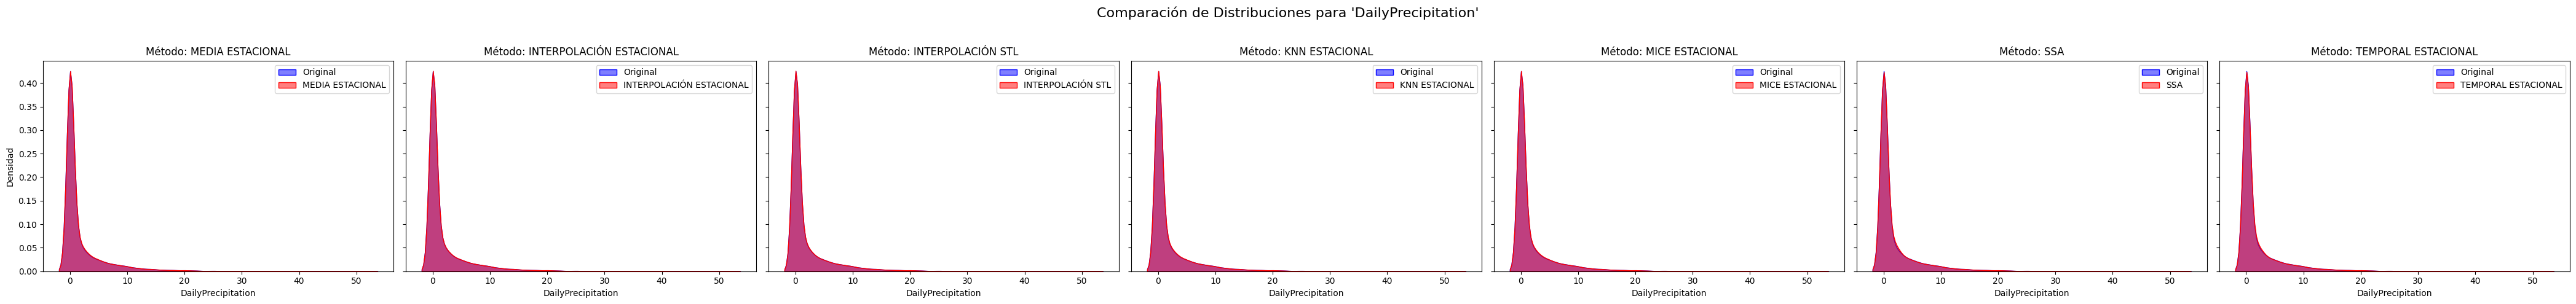

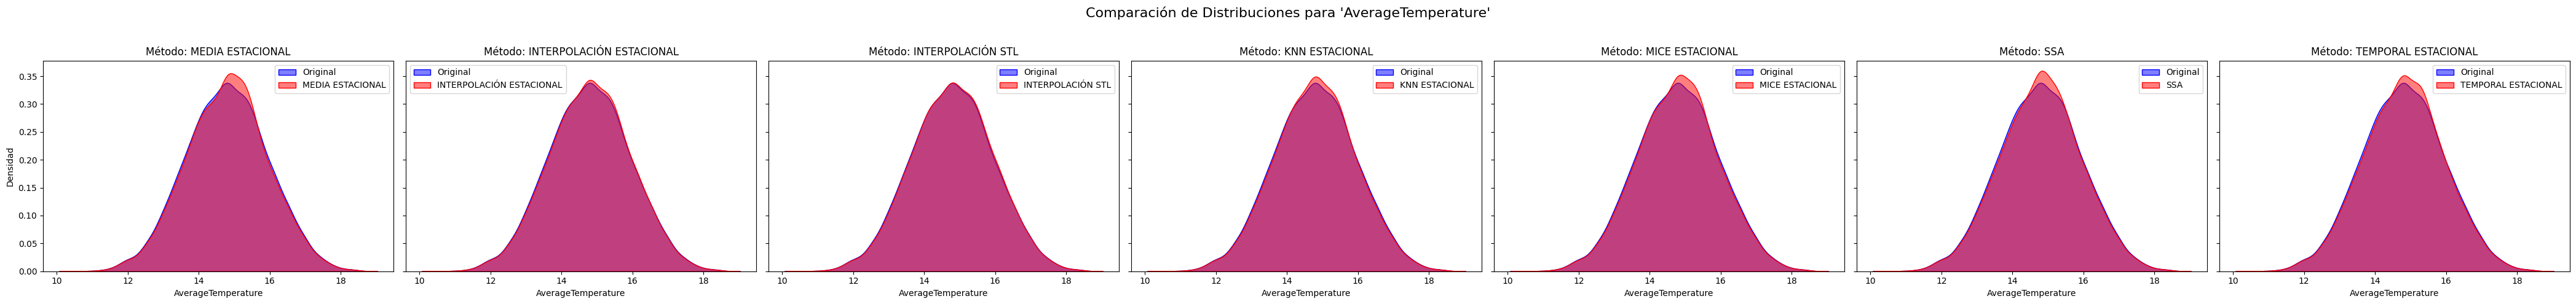

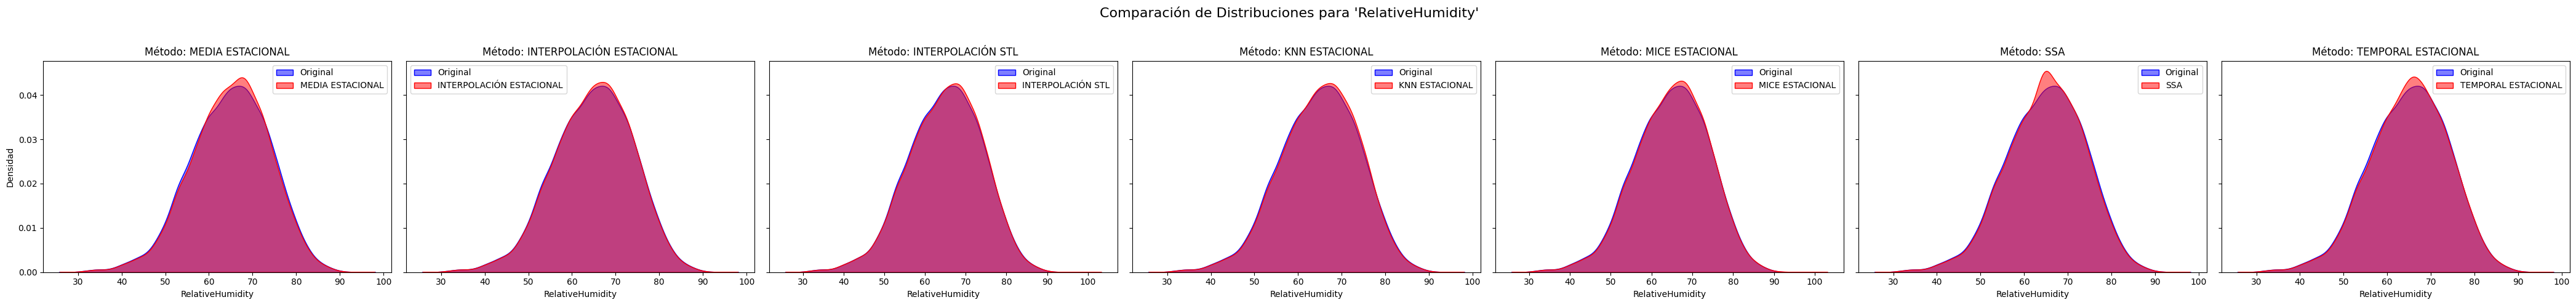

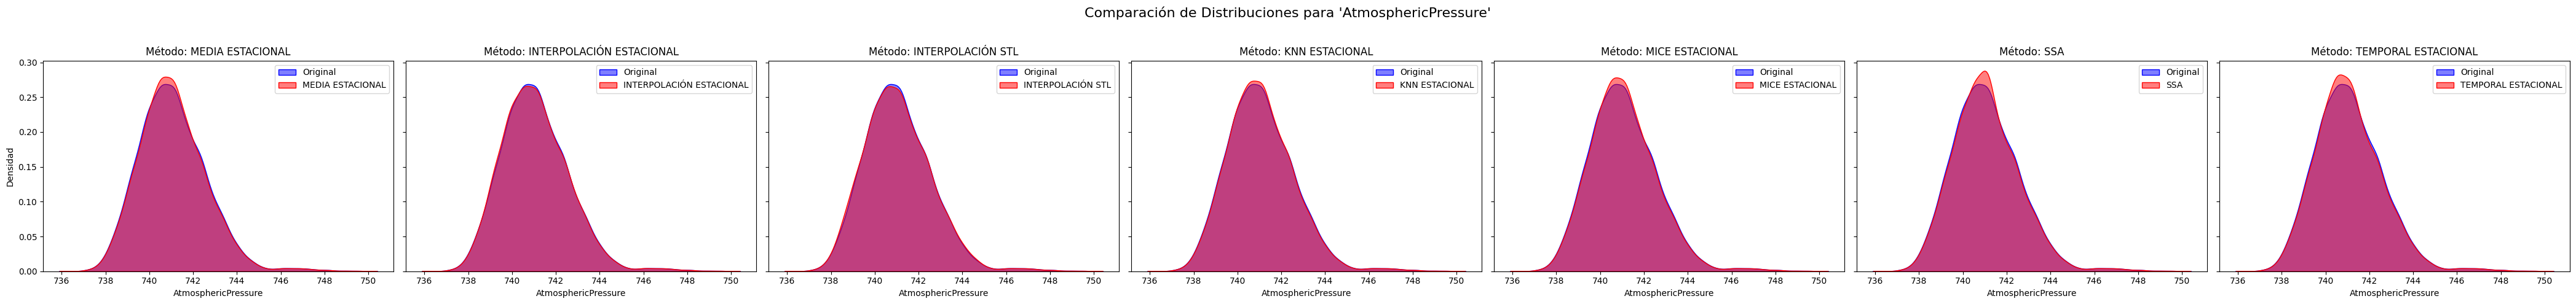

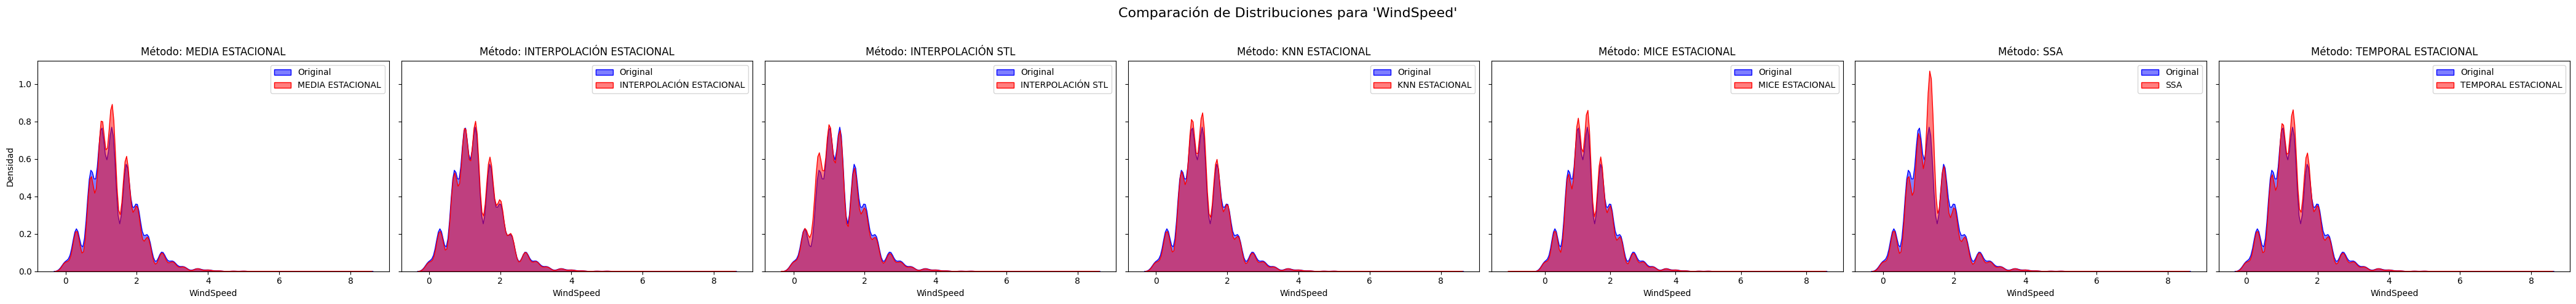

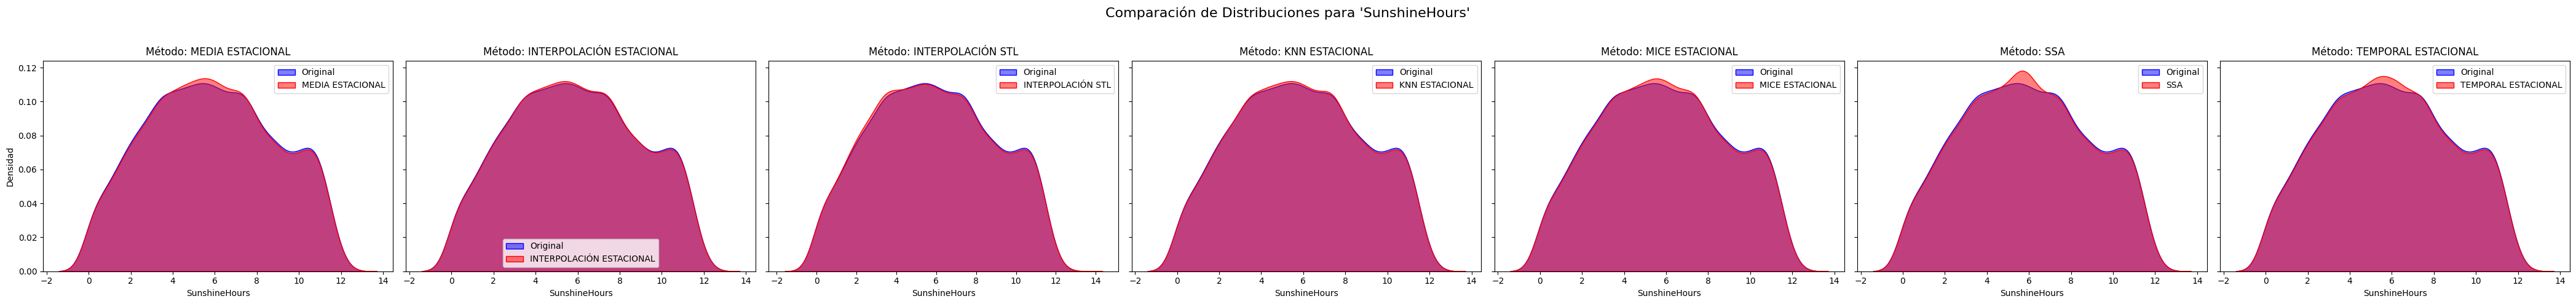

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", RuntimeWarning)


def comparar_distribuciones_lado_a_lado(df_original, df_imputados, variable, etiquetas, titulo=None):
    """
    Grafica las distribuciones de una variable antes y despu√©s de la imputaci√≥n,
    mostrando los gr√°ficos de los distintos m√©todos de imputaci√≥n lado a lado.

    :param df_original: DataFrame con los datos originales.
    :param df_imputados: Lista de DataFrames con los datos imputados.
    :param variable: Nombre de la variable a comparar.
    :param etiquetas: Lista de etiquetas para cada DataFrame imputado.
    :param titulo: T√≠tulo opcional para el conjunto de gr√°ficos.
    """
    num_metodos = len(df_imputados)
    fig, axes = plt.subplots(1, num_metodos, figsize=(6 * num_metodos, 5), sharey=True)

    if titulo:
        fig.suptitle(titulo, fontsize=16)

    for ax, df_imputado, etiqueta in zip(axes, df_imputados, etiquetas):
        sns.kdeplot(df_original[variable].dropna(), label="Original", fill=True, alpha=0.5, color="blue", ax=ax)
        sns.kdeplot(df_imputado[variable].dropna(), label=etiqueta, fill=True, alpha=0.5, color="red", ax=ax)
        ax.set_title(f"M√©todo: {etiqueta}")
        ax.set_xlabel(variable)
        ax.set_ylabel("Densidad")
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Lista de columnas a evaluar
columnas_a_imputar = ['DailyPrecipitation', 'AverageTemperature', 'RelativeHumidity', 'AtmosphericPressure', 'WindSpeed', 'SunshineHours']

# Lista de DataFrames imputados y sus etiquetas correspondientes
dataframes_imputados = [
    df_med_estacional, 
    df_interp_estacional,
    df_stl_interp, 
    df_knn_estacional,
    df_mice, 
    df_ssa, 
    df_temporal_estacional 
]
etiquetas_imputados =[
    'MEDIA ESTACIONAL', 
    'INTERPOLACI√ìN ESTACIONAL',
    'INTERPOLACI√ìN STL', 
    'KNN ESTACIONAL',
    'MICE ESTACIONAL', 
    'SSA', 
    'TEMPORAL ESTACIONAL'
]

# Generar los gr√°ficos de comparaci√≥n para cada variable
for columna in columnas_a_imputar:
    comparar_distribuciones_lado_a_lado(df_procesado, dataframes_imputados, columna, etiquetas_imputados,
                                        titulo=f"Comparaci√≥n de Distribuciones para '{columna}'")

## 2. EVALUACION DE LA DINAMICA TEMPORAL

Funciones de Autocorrelaci√≥n:

* ACF (Funci√≥n de Autocorrelaci√≥n): Compara los gr√°ficos ACF de la serie original e imputada para asegurarte de que se preserven las correlaciones a distintos rezagos.

* PACF (Funci√≥n de Autocorrelaci√≥n Parcial): Verifica que la dependencia directa entre observaciones se mantenga tras la imputaci√≥n.

* EACF (Funci√≥n de Autocorrelaci√≥n Extendida): Es especialmente √∫til para identificar estructuras ARMA en series con componentes estacionales y no estacionales.

Preservaci√≥n de Componentes de la Serie:

* An√°lisis de Descomposici√≥n: Utiliza m√©todos como STL o descomposici√≥n cl√°sica para separar la serie en sus componentes (tendencia, estacionalidad y residual) antes y despu√©s de la imputaci√≥n.

* Verifica que la amplitud y fase de los ciclos estacionales, as√≠ como la tendencia general, se mantengan, lo cual es cr√≠tico para variables como precipitaci√≥n y temperatura.



Para elegir el mejor m√©todo de imputaci√≥n, considera los siguientes criterios basados en los resultados obtenidos:

1. Preservaci√≥n de la Dependencia Temporal (ACF y PACF)
ACF Diff y PACF Diff (Diferencia de ACF y PACF)

Menor valor es mejor: Una menor diferencia indica que el m√©todo de imputaci√≥n mantiene mejor la estructura de correlaci√≥n temporal.

Interpretaci√≥n: Si los valores son altos, significa que la imputaci√≥n ha alterado significativamente la relaci√≥n entre observaciones a diferentes rezagos, lo que puede afectar la calidad del modelo predictivo.

2. Conservaci√≥n de Componentes de la Serie Temporal
Tendencia Corr (Correlaci√≥n de la Tendencia)

M√°s cercano a 1 es mejor: Indica que la tendencia general de la serie antes y despu√©s de la imputaci√≥n es similar.

Interpretaci√≥n: Un valor bajo sugiere que el m√©todo ha alterado la evoluci√≥n a largo plazo de la variable.

Estacionalidad Corr (Correlaci√≥n de la Estacionalidad)

M√°s cercano a 1 es mejor: Indica que la estructura estacional no se ha visto afectada por la imputaci√≥n.

Importante para: Variables con ciclos claros, como temperatura o precipitaci√≥n.

Residuo RMSE (Error Cuadr√°tico Medio del Residuo)

Menor valor es mejor: Indica que las fluctuaciones residuales son similares antes y despu√©s de la imputaci√≥n.

Interpretaci√≥n: Un valor alto puede indicar que la imputaci√≥n ha generado ruido adicional o alterado la variabilidad natural de la serie.

In [194]:
# Calculo de la dinamica temporal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import STL

# VARIABLES A EVALUAR
columnas_a_imputar = ['DailyPrecipitation', 'AverageTemperature', 'RelativeHumidity',
                      'AtmosphericPressure', 'WindSpeed', 'SunshineHours']

# Funci√≥n para calcular diferencia de ACF y PACF
def calcular_acf_pacf_diferencia(original, imputado, lags=30):
    original = original.dropna()
    imputado = imputado.dropna()
    min_len = min(len(original), len(imputado))
    original, imputado = original.iloc[:min_len], imputado.iloc[:min_len]

    acf_orig = acf(original, nlags=lags, fft=False)
    acf_imp = acf(imputado, nlags=lags, fft=False)
    pacf_orig = pacf(original, nlags=lags)
    pacf_imp = pacf(imputado, nlags=lags)

    acf_diff = np.mean(np.abs(acf_orig - acf_imp))
    pacf_diff = np.mean(np.abs(pacf_orig - pacf_imp))
    return acf_diff, pacf_diff

# Funci√≥n para calcular preservaci√≥n de componentes temporales
def calcular_preservacion_componentes(original, imputado, periodo_estacional=365):
    original = original.dropna()
    imputado = imputado.dropna()
    min_len = min(len(original), len(imputado))
    original, imputado = original.iloc[:min_len], imputado.iloc[:min_len]

    stl_orig = STL(original, period=periodo_estacional).fit()
    stl_imp = STL(imputado, period=periodo_estacional).fit()

    tendencia_corr = np.corrcoef(stl_orig.trend, stl_imp.trend)[0, 1]
    estacionalidad_corr = np.corrcoef(stl_orig.seasonal, stl_imp.seasonal)[0, 1]
    residuo_rmse = np.sqrt(np.mean((stl_orig.resid - stl_imp.resid) ** 2))

    return tendencia_corr, estacionalidad_corr, residuo_rmse

# DICCIONARIO DE IMPUTACIONES (ya predefinido en tu entorno)
df_imputaciones = {
    'Seasonal Mean Imputation':df_med_estacional, 
    'Seasonal Interpolation':df_interp_estacional,
    'STL-Based Interpolation':df_stl_interp, 
    'Seasonal KNN Imputation':df_knn_estacional,
    'Seasonal MICE Imputation':df_mice, 
    'SSA-based Imputation':df_ssa, 
    'Seasonal Temporal Regression Imputation':df_temporal_estacional 
}
# EVALUACI√ìN
resultados = []
for metodo, df_imputado in df_imputaciones.items():
    for variable in columnas_a_imputar:
        original = df_procesado[variable]
        imputado = df_imputado[variable]

        acf_diff, pacf_diff = calcular_acf_pacf_diferencia(original, imputado)
        tendencia_corr, estacionalidad_corr, residuo_rmse = calcular_preservacion_componentes(original, imputado)

        resultados.append([
            metodo, variable,
            acf_diff, pacf_diff,
            tendencia_corr, estacionalidad_corr,
            residuo_rmse
        ])

# Crear DataFrame base
df_dinamica_temporal = pd.DataFrame(resultados, columns=[
    'Method', 'Variable',
    'ACF Diff', 'PACF Diff',
    'Trend Corr', 'Seasonality Corr',
    'Residual RMSE'
])

# Normalizaci√≥n
metricas_menor_mejor = ['ACF Diff', 'PACF Diff', 'Residual RMSE']
metricas_mayor_mejor = ['Trend Corr', 'Seasonality Corr']

# Normalizadores
scaler_menor = MinMaxScaler()
scaler_mayor = MinMaxScaler()

# Copia para normalizaci√≥n
df_dinamica_temporal[[col + ' (Norm)' for col in metricas_menor_mejor]] = 1 - scaler_menor.fit_transform(
    df_dinamica_temporal[metricas_menor_mejor])

df_dinamica_temporal[[col + ' (Norm)' for col in metricas_mayor_mejor]] = scaler_mayor.fit_transform(
    df_dinamica_temporal[metricas_mayor_mejor])

# Calcular score final (Score_Din_Temp) como promedio de columnas normalizadas
columnas_norm = [col + ' (Norm)' for col in metricas_menor_mejor + metricas_mayor_mejor]
df_dinamica_temporal['Temp_Dinamic_Score'] = df_dinamica_temporal[columnas_norm].mean(axis=1)

# Reordenar columnas
df_dinamica_temporal = df_dinamica_temporal[
    ['Variable', 'Method'] +
    metricas_menor_mejor + metricas_mayor_mejor +
    columnas_norm + ['Temp_Dinamic_Score']
]

# Ordenar por Variable
df_dinamica_temporal = df_dinamica_temporal.sort_values(by='Variable').reset_index(drop=True)

# ============================
# MOSTRAR TODA LA TABLA COMPLETA
# ============================
display(df_dinamica_temporal)

Variable                                   Method  ACF Diff  \
0   AtmosphericPressure  Seasonal Temporal Regression Imputation  0.002343   
1   AtmosphericPressure                 Seasonal Mean Imputation  0.003454   
2   AtmosphericPressure                  Seasonal KNN Imputation  0.006864   
3   AtmosphericPressure                   Seasonal Interpolation  0.005683   
4   AtmosphericPressure                     SSA-based Imputation  0.001154   
5   AtmosphericPressure                 Seasonal MICE Imputation  0.004151   
6   AtmosphericPressure                  STL-Based Interpolation  0.010485   
7    AverageTemperature                 Seasonal Mean Imputation  0.018653   
8    AverageTemperature  Seasonal Temporal Regression Imputation  0.015891   
9    AverageTemperature                  Seasonal KNN Imputation  0.021255   
10   AverageTemperature                   Seasonal Interpolation  0.021591   
11   AverageTemperature                 Seasonal MICE Imputation  0.019761   
12   AverageTemperature                  STL-Based Interpolation  0.013550   
13   AverageTemperature                     SSA-based Imputation  0.014495   
14   DailyPrecipitation                 Seasonal Mean Imputation  0.001890   
15   DailyPrecipitation                  Seasonal KNN Imputation  0.001825   
16   DailyPrecipitation                 Seasonal MICE Imputation  0.001772   
17   DailyPrecipitation                  STL-Based Interpolation  0.001983   
18   DailyPrecipitation  Seasonal Temporal Regression Imputation  0.001341   
19   DailyPrecipitation                   Seasonal Interpolation  0.001445   
20   DailyPrecipitation                     SSA-based Imputation  0.001381   
21     RelativeHumidity                 Seasonal MICE Imputation  0.005212   
22     RelativeHumidity  Seasonal Temporal Regression Imputation  0.004222   
23     RelativeHumidity                     SSA-based Imputation  0.006513   
24     RelativeHumidity                  Seasonal KNN Imputation  0.003721   
25     RelativeHumidity                 Seasonal Mean Imputation  0.003776   
26     RelativeHumidity                  STL-Based Interpolation  0.003749   
27     RelativeHumidity                   Seasonal Interpolation  0.006535   
28        SunshineHours  Seasonal Temporal Regression Imputation  0.001471   
29        SunshineHours                  STL-Based Interpolation  0.007972   
30        SunshineHours                 Seasonal MICE Imputation  0.001479   
31        SunshineHours                 Seasonal Mean Imputation  0.001508   
32        SunshineHours                   Seasonal Interpolation  0.002002   
33        SunshineHours                  Seasonal KNN Imputation  0.001632   
34        SunshineHours                     SSA-based Imputation  0.001504   
35            WindSpeed                 Seasonal Mean Imputation  0.015051   
36            WindSpeed                  Seasonal KNN Imputation  0.006300   
37            WindSpeed                  STL-Based Interpolation  0.061325   
38            WindSpeed                 Seasonal MICE Imputation  0.007564   
39            WindSpeed  Seasonal Temporal Regression Imputation  0.009249   
40            WindSpeed                     SSA-based Imputation  0.012837   
41            WindSpeed                   Seasonal Interpolation  0.008420   

    PACF Diff  Residual RMSE  Trend Corr  Seasonality Corr  ACF Diff (Norm)  \
0    0.002197       0.276844    0.960477          0.364987     9.802528e-01   
1    0.002322       0.282779    0.958132          0.365464     9.617794e-01   
2    0.006035       0.287750    0.957202          0.361973     9.051186e-01   
3    0.002349       0.261607    0.971353          0.388179     9.247311e-01   
4    0.001725       0.272674    0.962739          0.373477     1.000000e+00   
5    0.002609       0.284189    0.957745          0.364834     9.502037e-01   
6    0.001845       0.264274    0.972219          0.417245     8.449383e-01   
7    0.005664       0.507880

In [196]:

# ============================
# MOSTRAR SOLO LOS MEJORES POR VARIABLE
# ============================
df_mejores_dinamica_temporal = df_dinamica_temporal.sort_values(
    by=['Variable', 'Temp_Dinamic_Score'],
    ascending=[True, False]
).groupby('Variable').first().reset_index()

# Mostrar resumen final
display(
    df_mejores_dinamica_temporal[['Variable', 'Method', 'Temp_Dinamic_Score']].style.hide(axis="index")
)


## 3. EVALUACION DE LA ESTRUCTURA TEMPORAL Y LA COMPLEJIDAD

* Estad√≠sticos de Reversibilidad Temporal:

  Calcula coeficientes que midan la simetr√≠a temporal y comp√°ralos antes y despu√©s de la imputaci√≥n para detectar cambios en la din√°mica de la serie.

* Cruces por Cero y Persistencia:

  Analiza la frecuencia de cruces por el nivel medio y la duraci√≥n de periodos por encima o por debajo de ciertos umbrales, lo que es √∫til para detectar alteraciones en variables como precipitaci√≥n o velocidad del viento.

* An√°lisis de Recurrencia:

  Utiliza gr√°ficos de recurrencia (RP) y an√°lisis de cuantificaci√≥n de recurrencia (RQA) para evaluar m√©tricas como determinismo, entrop√≠a y laminaridad, permitiendo detectar cambios sutiles en la din√°mica temporal.

* M√©tricas de Informaci√≥n:

  Calcula la entrop√≠a aproximada (ApEn), la entrop√≠a muestral (SampEn) o la informaci√≥n mutua en distintos rezagos. Estas medidas ayudan a identificar alteraciones en la complejidad y predictibilidad de la serie.

In [ ]:
# ========================
# 1. INSTALAR DEPENDENCIAS
# ========================
!pip install -q antropy pyunicorn

In [197]:
# ========================
# 2. IMPORTAR LIBRER√çAS
# ========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from antropy import sample_entropy, app_entropy
from pyunicorn.timeseries import RecurrencePlot
from scipy.stats import entropy
from sklearn.preprocessing import MinMaxScaler

# ========================
# 3. FUNCIONES DE M√âTRICAS
# ========================
def calcular_reversibilidad_temporal(serie):
    return np.mean(np.abs(serie.diff().dropna()))

def calcular_cruces_por_cero(serie):
    return np.sum(np.diff(np.sign(serie - serie.mean())) != 0)

def calcular_recurrencia(serie, threshold=0.1):
    serie = serie.dropna().values
    rp = RecurrencePlot(serie, threshold=threshold)
    determinismo = rp.determinism()
    laminaridad = rp.laminarity()
    rec_matrix = rp.recurrence_matrix()
    histograma = np.sum(rec_matrix, axis=1)
    entropia_rqa = entropy(histograma + 1e-10)
    return determinismo, entropia_rqa, laminaridad

def calcular_entropias(serie):
    serie = serie.dropna().values
    return sample_entropy(serie, 2, 0.2 * np.std(serie)), app_entropy(serie, 2, 0.2 * np.std(serie))

# ========================
# 4. EVALUAR ESTRUCTURA TEMPORAL
# ========================
df_imputaciones = {
    'Seasonal Mean Imputation':df_med_estacional, 
    'Seasonal Interpolation':df_interp_estacional,
    'STL-Based Interpolation':df_stl_interp, 
    'Seasonal KNN Imputation':df_knn_estacional,
    'Seasonal MICE Imputation':df_mice, 
    'SSA-based Imputation':df_ssa, 
    'Seasonal Temporal Regression Imputation':df_temporal_estacional 
}

estructura_resultados = []

for metodo, df in df_imputaciones.items():
    for var in columnas_a_imputar:
        serie = df[var]
        if serie.isnull().sum() > 0 or len(serie.dropna()) < 10:
            continue

        rev = calcular_reversibilidad_temporal(serie)
        cruz = calcular_cruces_por_cero(serie)
        det, ent_rqa, lam = calcular_recurrencia(serie)
        sampen, apen = calcular_entropias(serie)

        estructura_resultados.append([
            metodo, var, rev, cruz, det, ent_rqa, lam, sampen, apen
        ])

# ========================
# 5. CREAR DATAFRAME Y NORMALIZAR
# ========================
df_estructura_temporal = pd.DataFrame(estructura_resultados, columns=[
    'Method', 'Variable', 'Reversibility', 'Zero Crossings',
    'Determinism', 'RQA Entropy', 'Laminarity', 'SampEntropy', 'ApproxEntropy'
])

metricas_a_normalizar = [
    'Reversibility', 'Zero Crossings', 'Determinism',
    'Laminarity', 'RQA Entropy', 'SampEntropy', 'ApproxEntropy'
]

# Agregar columnas normalizadas con sufijo (Norm)
for var in columnas_a_imputar:
    df_var = df_estructura_temporal[df_estructura_temporal['Variable'] == var].copy()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_var[metricas_a_normalizar])
    for i, col in enumerate(metricas_a_normalizar):
        df_estructura_temporal.loc[df_var.index, col + ' (Norm)'] = scaled[:, i]

# ========================
# 6. CALCULAR SCORE NORMALIZADO
# ========================
df_estructura_temporal['Temp_Est_Score'] = (
    df_estructura_temporal['Reversibility (Norm)'] +
    df_estructura_temporal['Zero Crossings (Norm)'] +
    df_estructura_temporal['Determinism (Norm)'] +
    df_estructura_temporal['Laminarity (Norm)']
) - (
    df_estructura_temporal['RQA Entropy (Norm)'] +
    df_estructura_temporal['SampEntropy (Norm)'] +
    df_estructura_temporal['ApproxEntropy (Norm)']
)

display(
    df_estructura_temporal.style.hide(axis="index")
)


Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculatin

Method             Variable  \
0                  Seasonal Mean Imputation   DailyPrecipitation   
1                  Seasonal Mean Imputation   AverageTemperature   
2                  Seasonal Mean Imputation     RelativeHumidity   
3                  Seasonal Mean Imputation  AtmosphericPressure   
4                  Seasonal Mean Imputation            WindSpeed   
5                  Seasonal Mean Imputation        SunshineHours   
6                    Seasonal Interpolation   DailyPrecipitation   
7                    Seasonal Interpolation   AverageTemperature   
8                    Seasonal Interpolation     RelativeHumidity   
9                    Seasonal Interpolation  AtmosphericPressure   
10                   Seasonal Interpolation            WindSpeed   
11                   Seasonal Interpolation        SunshineHours   
12                  STL-Based Interpolation   DailyPrecipitation   
13                  STL-Based Interpolation   AverageTemperature   
14                  STL-Based Interpolation     RelativeHumidity   
15                  STL-Based Interpolation  AtmosphericPressure   
16                  STL-Based Interpolation            WindSpeed   
17                  STL-Based Interpolation        SunshineHours   
18                  Seasonal KNN Imputation   DailyPrecipitation   
19                  Seasonal KNN Imputation   AverageTemperature   
20                  Seasonal KNN Imputation     RelativeHumidity   
21                  Seasonal KNN Imputation  AtmosphericPressure   
22                  Seasonal KNN Imputation            WindSpeed   
23                  Seasonal KNN Imputation        SunshineHours   
24                 Seasonal MICE Imputation   DailyPrecipitation   
25                 Seasonal MICE Imputation   AverageTemperature   
26                 Seasonal MICE Imputation     RelativeHumidity   
27                 Seasonal MICE Imputation  AtmosphericPressure   
28                 Seasonal MICE Imputation            WindSpeed   
29                 Seasonal MICE Imputation        SunshineHours   
30                     SSA-based Imputation   DailyPrecipitation   
31                     SSA-based Imputation   AverageTemperature   
32                     SSA-based Imputation     RelativeHumidity   
33                     SSA-based Imputation  AtmosphericPressure   
34                     SSA-based Imputation            WindSpeed   
35                     SSA-based Imputation        SunshineHours   
36  Seasonal Temporal Regression Imputation   DailyPrecipitation   
37  Seasonal Temporal Regression Imputation   AverageTemperature   
38  Seasonal Temporal Regression Imputation     RelativeHumidity   
39  Seasonal Temporal Regression Imputation  AtmosphericPressure   
40  Seasonal Temporal Regression Imputation            WindSpeed   
41  Seasonal Temporal Regression Imputation        SunshineHours   

    Reversibility  Zero Crossings  Determinism  RQA Entropy  Laminarity  \
0        2.256901            2679     0.789836     8.831980    0.898319   
1        0.806120            3308     0.109823     9.192013    0.164589   
2        4.859321            2400     0.025264     9.218872    0.039968   
3        0.489118            1500     0.197671     9.218368    0.283617   
4        0.478054            3382     0.312940     9.187655    0.435518   
5        2.403925            3767     0.048858     9.236015    0.069455   
6        2.272867            2701     0.788522     8.835466    0.897736   
7        0.819469            3368     0.105768     9.198021    0.147975   
8        4.980258            2446     0.024486     9.217575    0.037657   
9        0.495628            1486     0.194961     9.223740    0.265747   
10       0.509861            3562     0.300604     9.188457    0.392053   
11       2.420862            3795     0.048706     9.237059    0.068880   
12       2.259258            2675     0.789372     8.836269    0.898423   
13       0.800869            3196     0.108610     9.202154   

Selecci√≥n del mejor m√©todo de imputaci√≥n por estructura temporal:



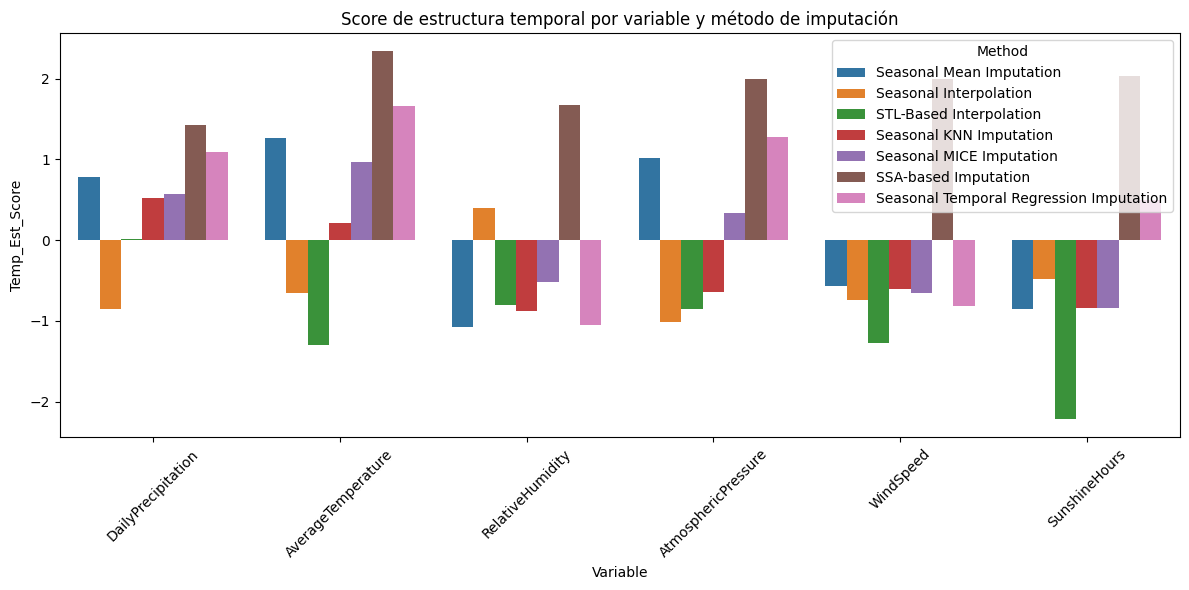

In [199]:
# ========================
# 7. MEJOR M√âTODO POR VARIABLE
# ========================
df_mejores = df_estructura_temporal.sort_values(
    by=['Variable', 'Temp_Est_Score'], ascending=[True, False]
).groupby('Variable').first().reset_index()

# (Opcional) Calcular justificaci√≥n, aunque no se mostrar√°
def justificar(fila):
    return (f"El m√©todo '{fila['Method']}' fue seleccionado para la variable '{fila['Variable']}' "
            f"por presentar la mejor combinaci√≥n de alta estructura temporal "
            f"(Determinismo={fila['Determinism']:.2f}, Laminaridad={fila['Laminarity']:.2f}, "
            f"Reversibilidad={fila['Reversibility']:.2f}) y baja entrop√≠a "
            f"(Entrop√≠a RQA={fila['RQA Entropy']:.2f}, SampEn={fila['SampEntropy']:.2f}, ApEn={fila['ApproxEntropy']:.2f}).")

df_mejores['Justificaci√≥n'] = df_mejores.apply(justificar, axis=1)

# ========================
# 8. MOSTRAR RESULTADOS
# ========================
columnas_salida = [
    'Variable', 'Method', 'Reversibility', 'Zero Crossings',
    'Determinism', 'RQA Entropy', 'Laminarity',
    'SampEntropy', 'ApproxEntropy', 'Temp_Est_Score'
]

print("Selecci√≥n del mejor m√©todo de imputaci√≥n por estructura temporal:\n")

display(
    df_mejores[columnas_salida].style.hide(axis="index")
)

# ========================
# 9. VISUALIZACI√ìN
# ========================
plt.figure(figsize=(12, 6))
sns.barplot(data=df_estructura_temporal, x='Variable', y='Temp_Est_Score', hue='Method')
plt.xticks(rotation=45)
plt.title("Score de estructura temporal por variable y m√©todo de imputaci√≥n")
plt.tight_layout()
plt.show()


## Criterios para la Selecci√≥n del Mejor M√©todo por Variable (`Score_Est_Temp`)

### ¬øQu√© mide `Score_Est_Temp`?

El **`Score_Est_Temp`** es un √≠ndice compuesto que eval√∫a qu√© tan bien una serie imputada conserva la **estructura temporal** de la serie original. Se construye a partir de m√©tricas que capturan la complejidad, la regularidad y los patrones din√°micos de la serie.

La f√≥rmula general es:

### üßÆ F√≥rmula del `Score_Est_Temp`

```text
Score_Est_Temp = (
    Reversibilidad (normalizada)
  + Cruces por Cero (normalizada)
  + Determinismo (normalizado)
  + Laminaridad (normalizada)
) - (
    Entrop√≠a RQA (normalizada)
  + SampEn (normalizada)
  + ApEn (normalizada)
)


---

### ‚úÖ ¬øQu√© representa cada grupo de m√©tricas?

- **M√©tricas que SUMAN al score (estructura positiva)**:
  - **Reversibilidad**: indica simetr√≠a en la din√°mica temporal.
  - **Cruces por Cero**: mide la alternancia en torno al promedio.
  - **Determinismo**: representa patrones repetitivos y predecibles.
  - **Laminaridad**: mide la permanencia en estados similares.

- **M√©tricas que RESTAN al score (complejidad o aleatoriedad)**:
  - **Entrop√≠a RQA**: mide la dispersi√≥n de los patrones recurrentes.
  - **Sample Entropy (SampEn)**: refleja la imprevisibilidad de la serie.
  - **Approximate Entropy (ApEn)**: mide la irregularidad de las subsecuencias.

---

### üß™ ¬øPor qu√© se normalizan las m√©tricas?

Cada m√©trica tiene una escala distinta. Para compararlas de forma equitativa, se aplic√≥ **normalizaci√≥n Min-Max** dentro de cada variable, asegurando que todas contribuyan de manera proporcional al `Score_Est_Temp`.

---

### ü•á ¬øCu√°l fue el criterio de selecci√≥n del mejor m√©todo?

Para cada variable:

1. Se calcularon todos los valores de `Score_Est_Temp` para los distintos m√©todos de imputaci√≥n.
2. Se seleccion√≥ el **m√©todo que obtuvo el valor m√°s alto del score**, es decir:

> **El mejor m√©todo es el que maximiza el `Score_Est_Temp`**.

Esto se implement√≥ mediante:

```python
df_estructura_temporal.sort_values(
    by=['Variable', 'Score_Est_Temp'], ascending=[True, False]
).groupby('Variable').first()


## 4. CONSERVACION DE EVENTOS EXTREMOS
* Eventos M√°ximos y M√≠nimos:

  Analiza la distribuci√≥n de valores extremos (m√°ximos y m√≠nimos) por periodos y verifica que la intensidad y frecuencia de estos eventos se mantengan tras la imputaci√≥n, aspecto especialmente relevante en variables ambientales.


In [200]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# ===========
# 1. PAR√ÅMETROS
# ===========
variables = ['DailyPrecipitation', 'AverageTemperature', 'RelativeHumidity',
             'AtmosphericPressure', 'WindSpeed', 'SunshineHours']

imputaciones = {
    'Seasonal Mean Imputation':df_med_estacional, 
    'Seasonal Interpolation':df_interp_estacional,
    'STL-Based Interpolation':df_stl_interp, 
    'Seasonal KNN Imputation':df_knn_estacional,
    'Seasonal MICE Imputation':df_mice, 
    'SSA-based Imputation':df_ssa, 
    'Seasonal Temporal Regression Imputation':df_temporal_estacional 
}

df_procesado = df_procesado.copy()
df_procesado.index = pd.to_datetime(df_procesado.index)

# ===========
# 2. FUNCI√ìN DE EVALUACI√ìN DE EXTREMOS
# ===========
def evaluar_eventos_extremos(df_original, df_imputado, variable):
    df_original = df_original.copy()
    df_imputado = df_imputado.copy()
    df_original.index = pd.to_datetime(df_original.index)
    df_imputado.index = pd.to_datetime(df_imputado.index)

    # Eliminar NaN y extraer a√±o
    df_orig_clean = df_original[[variable]].dropna()
    df_orig_clean['Year'] = df_orig_clean.index.year
    df_imputado['Year'] = df_imputado.index.year

    # Obtener extremos por a√±o
    extremos_orig = df_orig_clean.groupby('Year')[variable].agg(['max', 'min'])
    extremos_imp = df_imputado.groupby('Year')[variable].agg(['max', 'min'])

    # Intersecci√≥n de a√±os v√°lidos
    anios_comunes = extremos_orig.index.intersection(extremos_imp.index)
    if len(anios_comunes) == 0:
        return None

    # MAE de extremos
    mae_max = mean_absolute_error(extremos_orig.loc[anios_comunes]['max'],
                                  extremos_imp.loc[anios_comunes]['max'])
    mae_min = mean_absolute_error(extremos_orig.loc[anios_comunes]['min'],
                                  extremos_imp.loc[anios_comunes]['min'])

    # Normalizaci√≥n por rango
    rango = df_orig_clean[variable].max() - df_orig_clean[variable].min()
    mae_max_norm = mae_max / rango if rango != 0 else 0
    mae_min_norm = mae_min / rango if rango != 0 else 0

    # Score final (1 = perfecto, 0 = pobre)
    score = 1 - (mae_max_norm + mae_min_norm) / 2

    return mae_max, mae_min, mae_max_norm, mae_min_norm, score

# ===========
# 3. EVALUACI√ìN GLOBAL DE M√âTODOS
# ===========
resultados = []

for metodo, df_imp in imputaciones.items():
    for var in variables:
        resultado = evaluar_eventos_extremos(df_procesado, df_imp, var)
        if resultado is not None:
            mae_max, mae_min, mae_max_norm, mae_min_norm, score = resultado
            resultados.append({
                'Variable': var,
                'Method': metodo,
                'MAE_Max': mae_max,
                'MAE_Min': mae_min,
                'MAE_Max_Norm': mae_max_norm,
                'MAE_Min_Norm': mae_min_norm,
                'Ext_Events_Score': score
            })

# Crear DataFrame y ordenar
df_eventos_extremos = pd.DataFrame(resultados)
df_eventos_extremos = df_eventos_extremos.sort_values(by=['Variable', 'Ext_Events_Score'], ascending=[True, False])

# Mostrar resultado ordenado por Variable
display(df_eventos_extremos)





Variable                                   Method  \
3   AtmosphericPressure                 Seasonal Mean Imputation   
33  AtmosphericPressure                     SSA-based Imputation   
39  AtmosphericPressure  Seasonal Temporal Regression Imputation   
15  AtmosphericPressure                  STL-Based Interpolation   
27  AtmosphericPressure                 Seasonal MICE Imputation   
9   AtmosphericPressure                   Seasonal Interpolation   
21  AtmosphericPressure                  Seasonal KNN Imputation   
1    AverageTemperature                 Seasonal Mean Imputation   
7    AverageTemperature                   Seasonal Interpolation   
13   AverageTemperature                  STL-Based Interpolation   
19   AverageTemperature                  Seasonal KNN Imputation   
25   AverageTemperature                 Seasonal MICE Imputation   
31   AverageTemperature                     SSA-based Imputation   
37   AverageTemperature  Seasonal Temporal Regression Imputation   
0    DailyPrecipitation                 Seasonal Mean Imputation   
18   DailyPrecipitation                  Seasonal KNN Imputation   
24   DailyPrecipitation                 Seasonal MICE Imputation   
30   DailyPrecipitation                     SSA-based Imputation   
36   DailyPrecipitation  Seasonal Temporal Regression Imputation   
12   DailyPrecipitation                  STL-Based Interpolation   
6    DailyPrecipitation                   Seasonal Interpolation   
20     RelativeHumidity                  Seasonal KNN Imputation   
32     RelativeHumidity                     SSA-based Imputation   
2      RelativeHumidity                 Seasonal Mean Imputation   
8      RelativeHumidity                   Seasonal Interpolation   
38     RelativeHumidity  Seasonal Temporal Regression Imputation   
14     RelativeHumidity                  STL-Based Interpolation   
26     RelativeHumidity                 Seasonal MICE Imputation   
5         SunshineHours                 Seasonal Mean Imputation   
11        SunshineHours                   Seasonal Interpolation   
23        SunshineHours                  Seasonal KNN Imputation   
29        SunshineHours                 Seasonal MICE Imputation   
35        SunshineHours                     SSA-based Imputation   
41        SunshineHours  Seasonal Temporal Regression Imputation   
17        SunshineHours                  STL-Based Interpolation   
34            WindSpeed                     SSA-based Imputation   
4             WindSpeed                 Seasonal Mean Imputation   
40            WindSpeed  Seasonal Temporal Regression Imputation   
16            WindSpeed                  STL-Based Interpolation   
22            WindSpeed                  Seasonal KNN Imputation   
28            WindSpeed                 Seasonal MICE Imputation   
10            WindSpeed                   Seasonal Interpolation   

         MAE_Max       MAE_Min  MAE_Max_Norm  MAE_Min_Norm  Ext_Events_Score  
3   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          1.000000  
33  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          1.000000  
39  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          1.000000  
15  3.441958e-03  0.000000e+00  2.627449e-04  0.000000e+00          0.999869  
27  7.328467e-03  0.000000e+00  5.594249e-04  0.000000e+00          0.999720  
9   4.354839e-02  0.000000e+00  3.324304e-03  0.000000e+00          0.998338  
21  5.806452e-02  3.419355e-02  4.432406e-03  2.610195e-03          0.996479  
1   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          1.000000  
7   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          1.000000  
13  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          1.000000  
19  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          1.000000  
25  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00          1.000000  
31  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     

In [202]:
# ===========
# 4. MEJOR M√âTODO POR VARIABLE
# ===========
df_top_extremos = df_eventos_extremos.sort_values(by=['Variable', 'Ext_Events_Score'], ascending=[True, False])
df_mejor_extremos = df_top_extremos.groupby('Variable', as_index=False).first()


# ===========
# 6. RESULTADOS
# ===========
print("MEJOR M√âTODO PARA CONSERVACI√ìN DE EXTREMOS:")
display(df_mejor_extremos[['Variable', 'Method', 'MAE_Max','MAE_Min','Ext_Events_Score']].style.hide(axis="index"))



MEJOR M√âTODO PARA CONSERVACI√ìN DE EXTREMOS:


### üéØ Evaluaci√≥n de Conservaci√≥n de Eventos Extremos

El objetivo de esta m√©trica es identificar qu√© m√©todos de imputaci√≥n conservan mejor los **valores extremos anuales** (m√°ximos y m√≠nimos) de las series temporales originales.

---

#### üßÆ ¬øC√≥mo se calcula el `Score_Eventos_Ext`?

Este score mide la similitud entre los valores extremos anuales (m√°ximos y m√≠nimos) de la serie original y la imputada. Se calcula con la siguiente f√≥rmula:

Score_Eventos_Ext = 1 - (MAE_Max_Norm + MAE_Min_Norm) / 2


Donde:

- **MAE_Max_Norm**: Error absoluto medio entre los m√°ximos anuales reales e imputados, **normalizado por el rango** de la variable.
- **MAE_Min_Norm**: Error absoluto medio entre los m√≠nimos anuales reales e imputados, tambi√©n normalizado.
- El **rango** es la diferencia entre el valor m√°ximo y m√≠nimo de la variable original.

---

#### üìà Interpretaci√≥n del Score

- Un valor **cercano a 1** indica una alta fidelidad en la conservaci√≥n de los extremos.
- Un valor **cercano a 0** indica una pobre conservaci√≥n de los extremos.
- El valor **1** es ideal: los extremos imputados coinciden exactamente con los reales.

---

#### üèÜ Criterio para Seleccionar el Mejor M√©todo

Para cada variable, se selecciona el **m√©todo con el mayor valor de `Score_Eventos_Ext`**, ya que esto indica que dicho m√©todo conserva mejor los eventos extremos.

---


In [204]:
# ==========================================
# EVALUACI√ìN INTEGRAL DE M√âTODOS DE IMPUTACI√ìN
# ==========================================
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Pesos personalizados por variable
pesos_por_variable = {
    'DailyPrecipitation':    {'estructure': 0.20, 'dynamics': 0.20, 'extreme_events': 0.40, 'distributional_differences': 0.20},
    'AverageTemperature':    {'estructure': 0.30, 'dynamics': 0.30, 'extreme_events': 0.10, 'distributional_differences': 0.30},
    'RelativeHumidity':      {'estructure': 0.30, 'dynamics': 0.30, 'extreme_events': 0.10, 'distributional_differences': 0.30},
    'AtmosphericPressure':   {'estructure': 0.35, 'dynamics': 0.35, 'extreme_events': 0.10, 'distributional_differences': 0.20},
    'WindSpeed':             {'estructure': 0.25, 'dynamics': 0.20, 'extreme_events': 0.35, 'distributional_differences': 0.20},
    'SunshineHours':         {'estructure': 0.25, 'dynamics': 0.20, 'extreme_events': 0.35, 'distributional_differences': 0.20},
}

# 2. Renombrar columnas para consistencia
df_estructura_temporal = df_estructura_temporal.rename(columns={'Temp_Est_Score': 'Estructure_Score'})
df_dinamica_temporal = df_dinamica_temporal.rename(columns={'Temp_Dinamic_Score': 'Dinamics_Score'})
df_eventos_extremos = df_eventos_extremos.rename(columns={'Ext_Events_Score': 'Extreme_Events_Score'})
df_score_diferencias_relativas = df_score_diferencias_relativas.rename(columns={'WRD_Score': 'WRD_Score'})

# 3. Unificaci√≥n de todas las m√©tricas
df_all = df_estructura_temporal[['Variable', 'Method', 'Estructure_Score']].merge(
    df_dinamica_temporal[['Variable', 'Method', 'Dinamics_Score']], on=['Variable', 'Method']
).merge(
    df_eventos_extremos[['Variable', 'Method', 'Extreme_Events_Score']], on=['Variable', 'Method']
).merge(
    df_score_diferencias_relativas[['Variable', 'Method', 'WRD_Score']], on=['Variable', 'Method']
)

df_resultados_detallado = df_all.copy()

# 4. Normalizaci√≥n por variable
df_norm = df_all.copy()
for var in df_norm['Variable'].unique():
    idx = df_norm['Variable'] == var
    for col in ['Estructure_Score', 'Dinamics_Score', 'Extreme_Events_Score', 'WRD_Score']:
        df_norm.loc[idx, col + '_Norm'] = MinMaxScaler().fit_transform(df_norm.loc[idx, [col]])

# 5. C√°lculo del Score Global con pesos personalizados
df_norm['Final_Global_Score'] = 0.0
for var in df_norm['Variable'].unique():
    pesos = pesos_por_variable[var]
    idx = df_norm['Variable'] == var
    df_norm.loc[idx, 'Final_Global_Score'] = (
        pesos['estructure']  * df_norm.loc[idx, 'Estructure_Score_Norm'] +
        pesos['dynamics']    * df_norm.loc[idx, 'Dinamics_Score_Norm'] +
        pesos['extreme_events']     * df_norm.loc[idx, 'Extreme_Events_Score_Norm'] +
        pesos['distributional_differences'] * df_norm.loc[idx, 'WRD_Score_Norm']
    )

df_resultados_normalizados = df_norm.copy()

# 6. Selecci√≥n del mejor m√©todo por variable
df_mejores_metodos = df_resultados_normalizados.sort_values(
    by=['Variable', 'Final_Global_Score'], ascending=[True, False]
).groupby('Variable').first().reset_index()

# 7. Resultados
print("TABLA DETALLADA (M√©tricas originales):")
display(df_resultados_detallado)

print("TABLA NORMALIZADA Y SCORE FINAL:")
display(df_resultados_normalizados[[
    'Variable', 'Method',
    'Estructure_Score_Norm', 'Dinamics_Score_Norm', 'Extreme_Events_Score_Norm',
    'WRD_Score_Norm', 'Final_Global_Score'
]])



TABLA DETALLADA (M√©tricas originales):


Variable                                   Method  \
0    DailyPrecipitation                 Seasonal Mean Imputation   
1    AverageTemperature                 Seasonal Mean Imputation   
2      RelativeHumidity                 Seasonal Mean Imputation   
3   AtmosphericPressure                 Seasonal Mean Imputation   
4             WindSpeed                 Seasonal Mean Imputation   
5         SunshineHours                 Seasonal Mean Imputation   
6    DailyPrecipitation                   Seasonal Interpolation   
7    AverageTemperature                   Seasonal Interpolation   
8      RelativeHumidity                   Seasonal Interpolation   
9   AtmosphericPressure                   Seasonal Interpolation   
10            WindSpeed                   Seasonal Interpolation   
11        SunshineHours                   Seasonal Interpolation   
12   DailyPrecipitation                  STL-Based Interpolation   
13   AverageTemperature                  STL-Based Interpolation   
14     RelativeHumidity                  STL-Based Interpolation   
15  AtmosphericPressure                  STL-Based Interpolation   
16            WindSpeed                  STL-Based Interpolation   
17        SunshineHours                  STL-Based Interpolation   
18   DailyPrecipitation                  Seasonal KNN Imputation   
19   AverageTemperature                  Seasonal KNN Imputation   
20     RelativeHumidity                  Seasonal KNN Imputation   
21  AtmosphericPressure                  Seasonal KNN Imputation   
22            WindSpeed                  Seasonal KNN Imputation   
23        SunshineHours                  Seasonal KNN Imputation   
24   DailyPrecipitation                 Seasonal MICE Imputation   
25   AverageTemperature                 Seasonal MICE Imputation   
26     RelativeHumidity                 Seasonal MICE Imputation   
27  AtmosphericPressure                 Seasonal MICE Imputation   
28            WindSpeed                 Seasonal MICE Imputation   
29        SunshineHours                 Seasonal MICE Imputation   
30   DailyPrecipitation                     SSA-based Imputation   
31   AverageTemperature                     SSA-based Imputation   
32     RelativeHumidity                     SSA-based Imputation   
33  AtmosphericPressure                     SSA-based Imputation   
34            WindSpeed                     SSA-based Imputation   
35        SunshineHours                     SSA-based Imputation   
36   DailyPrecipitation  Seasonal Temporal Regression Imputation   
37   AverageTemperature  Seasonal Temporal Regression Imputation   
38     RelativeHumidity  Seasonal Temporal Regression Imputation   
39  AtmosphericPressure  Seasonal Temporal Regression Imputation   
40            WindSpeed  Seasonal Temporal Regression Imputation   
41        SunshineHours  Seasonal Temporal Regression Imputation   

    Estructure_Score  Dinamics_Score  Extreme_Events_Score  WRD_Score  
0           0.778370        0.967774              1.000000   0.624369  
1           1.263221        0.625853              1.000000   0.243816  
2          -1.081213        0.428157              0.999941   0.220837  
3           1.019191        0.890984              1.000000   0.511779  
4          -0.565984        0.460852              0.999785   0.597876  
5          -0.855948        0.782843              1.000000   0.312372  
6          -0.855690        0.967859              0.999113   0.350000  
7          -0.657688        0.618367              1.000000   0.775856  
8           0.397066        0.412678              0.999672   0.442257  
9          -1.012532        0.897191              0.998338   0.323838  
10         -0.739596        0.466615              0.996135   0.459291  
11         -0.476089        0.778917              1.000000   0.454232  
12          0.010336        0.960666              0.999992   0.486621  
13         -1.303834        0.657091              1.000000   0.847978  
14        

TABLA NORMALIZADA Y SCORE FINAL:


Variable                                   Method  \
0    DailyPrecipitation                 Seasonal Mean Imputation   
1    AverageTemperature                 Seasonal Mean Imputation   
2      RelativeHumidity                 Seasonal Mean Imputation   
3   AtmosphericPressure                 Seasonal Mean Imputation   
4             WindSpeed                 Seasonal Mean Imputation   
5         SunshineHours                 Seasonal Mean Imputation   
6    DailyPrecipitation                   Seasonal Interpolation   
7    AverageTemperature                   Seasonal Interpolation   
8      RelativeHumidity                   Seasonal Interpolation   
9   AtmosphericPressure                   Seasonal Interpolation   
10            WindSpeed                   Seasonal Interpolation   
11        SunshineHours                   Seasonal Interpolation   
12   DailyPrecipitation                  STL-Based Interpolation   
13   AverageTemperature                  STL-Based Interpolation   
14     RelativeHumidity                  STL-Based Interpolation   
15  AtmosphericPressure                  STL-Based Interpolation   
16            WindSpeed                  STL-Based Interpolation   
17        SunshineHours                  STL-Based Interpolation   
18   DailyPrecipitation                  Seasonal KNN Imputation   
19   AverageTemperature                  Seasonal KNN Imputation   
20     RelativeHumidity                  Seasonal KNN Imputation   
21  AtmosphericPressure                  Seasonal KNN Imputation   
22            WindSpeed                  Seasonal KNN Imputation   
23        SunshineHours                  Seasonal KNN Imputation   
24   DailyPrecipitation                 Seasonal MICE Imputation   
25   AverageTemperature                 Seasonal MICE Imputation   
26     RelativeHumidity                 Seasonal MICE Imputation   
27  AtmosphericPressure                 Seasonal MICE Imputation   
28            WindSpeed                 Seasonal MICE Imputation   
29        SunshineHours                 Seasonal MICE Imputation   
30   DailyPrecipitation                     SSA-based Imputation   
31   AverageTemperature                     SSA-based Imputation   
32     RelativeHumidity                     SSA-based Imputation   
33  AtmosphericPressure                     SSA-based Imputation   
34            WindSpeed                     SSA-based Imputation   
35        SunshineHours                     SSA-based Imputation   
36   DailyPrecipitation  Seasonal Temporal Regression Imputation   
37   AverageTemperature  Seasonal Temporal Regression Imputation   
38     RelativeHumidity  Seasonal Temporal Regression Imputation   
39  AtmosphericPressure  Seasonal Temporal Regression Imputation   
40            WindSpeed  Seasonal Temporal Regression Imputation   
41        SunshineHours  Seasonal Temporal Regression Imputation   

    Estructure_Score_Norm  Dinamics_Score_Norm  Extreme_Events_Score_Norm  \
0                0.717226             0.589832                   1.000000   
1                0.704748             0.291604                   0.000000   
2                0.000000             0.415885                   0.991291   
3                0.674424             0.788311                   1.000000   
4                0.216072             0.919680                   0.944341   
5                0.319606             0.971653                   1.000000   
6                0.000000             0.596843                   0.000000   
7                0.177390             0.121844                   0.000000   
8                0.536677             0.000000                   0.951231   
9                0.000000             0.837732                   0.527972   
10               0.163032             0.939803                   0.000000   
11               0.408944             0.915026                   1.000000   
12               0.380118             0.000000                   0.991251   
13          

In [207]:

print("MEJOR M√âTODO POR VARIABLE:")
display(df_mejores_metodos[['Variable', 'Method', 'Final_Global_Score']].style.hide(axis="index"))

MEJOR M√âTODO POR VARIABLE:


## üß™ Evaluaci√≥n Integral de M√©todos de Imputaci√≥n

La evaluaci√≥n integral de los m√©todos de imputaci√≥n se basa en la combinaci√≥n de m√∫ltiples dimensiones relevantes para la calidad de los datos ambientales. Se han considerado cuatro ejes de evaluaci√≥n:

- **Estructura temporal** (`Score_Estructura`): captura la complejidad y patrones de recurrencia del sistema.
- **Din√°mica temporal** (`Score_Dinamica`): eval√∫a la preservaci√≥n de la din√°mica determinista/no lineal de la serie original.
- **Eventos extremos** (`Score_EventosExtremos`): mide qu√© tan bien se conservan los eventos extremos relevantes para la variable.
- **Diferencias estad√≠sticas relativas** (`Score_DiferenciasRelativas`): analiza qu√© tan cercanas son las distribuciones estad√≠sticas (media, desviaci√≥n est√°ndar, asimetr√≠a y curtosis) entre la serie imputada y la original.

Cada una de estas m√©tricas fue **normalizada por variable**, y luego ponderada de forma personalizada para obtener un **Score Global Final**.

---

### ‚öñÔ∏è Criterios de ponderaci√≥n por variable

Dado que cada variable ambiental presenta propiedades distintas en cuanto a su comportamiento, din√°mica y relevancia de eventos extremos, se han definido **pesos espec√≠ficos** para cada dimensi√≥n de evaluaci√≥n, por variable:

| Variable              | Estructura | Din√°mica | Eventos Extremos | Diferencias |
|-----------------------|------------|----------|------------------|-------------|
| **DailyPrecipitation**     | 0.20       | 0.20     | **0.40**             | 0.20        |
| **AverageTemperature**     | 0.30       | 0.30     | 0.10             | **0.30**    |
| **RelativeHumidity**       | 0.30       | 0.30     | 0.10             | **0.30**    |
| **AtmosphericPressure**    | **0.35**   | **0.35** | 0.10             | 0.20        |
| **WindSpeed**              | 0.25       | 0.20     | **0.35**         | 0.20        |
| **SunshineHours**          | 0.25       | 0.20     | **0.35**         | 0.20        |

---

### üß† Justificaci√≥n de los pesos

- **DailyPrecipitation**: La correcta imputaci√≥n de eventos extremos (lluvias intensas, d√≠as secos) es crucial para esta variable. Por ello, se asigna un alto peso (0.40) a la m√©trica de eventos extremos.

- **AverageTemperature y RelativeHumidity**: Ambas variables son m√°s continuas, con din√°micas estacionales bien definidas. Se prioriza la estructura, din√°mica y concordancia estad√≠stica general.

- **AtmosphericPressure**: Es una variable estable y suavemente cambiante, con poca relevancia de eventos extremos. Se prioriza la conservaci√≥n de su estructura y din√°mica.

- **WindSpeed y SunshineHours**: Estas variables pueden contener interrupciones abruptas, r√°fagas o d√≠as completamente nublados. Por tanto, se asigna una mayor importancia a la detecci√≥n de eventos extremos.

---

### üèÅ Selecci√≥n del mejor m√©todo

El **Score Global Final** se calcula como una combinaci√≥n ponderada de las m√©tricas normalizadas. Para cada variable, se selecciona como *mejor m√©todo* aquel con el **mayor Score Global**, indicando el mejor balance integral entre estructura, din√°mica, eventos extremos y similitud estad√≠stica.



In [142]:
# Resultado final, creacion del dataframe imputado segun los resultados de la evaluacion de los mejores metodos de imputacion

# Diccionario de selecci√≥n del mejor m√©todo por variable
seleccion_mejores_metodos = {
    'AtmosphericPressure': ('SSA', df_ssa),
    'AverageTemperature':  ('INTERPOLACI√ìN STL', df_stl_interp),
    'DailyPrecipitation':  ('SSA', df_ssa),
    'RelativeHumidity':    ('INTERPOLACI√ìN STL', df_stl_interp),
    'SunshineHours':       ('SSA', df_ssa),
    'WindSpeed':           ('SSA', df_ssa)
}


# Crear una copia del DataFrame original con las columnas auxiliares
df_imputado = df_procesado[['Year', 'Month', 'Day']].copy()
df_imputado.index = df_procesado.index  # Asegurar que ProcessDate se mantenga como √≠ndice

# Iterar sobre la selecci√≥n de mejores m√©todos
for variable, (metodo, df_fuente) in seleccion_mejores_metodos.items():
    # Extraer la serie imputada de la variable desde el DataFrame correspondiente
    if variable in df_fuente.columns:
        serie_imputada = df_fuente[variable]
        # Asegurar que los √≠ndices coincidan
        serie_imputada = serie_imputada.reindex(df_imputado.index)
        # Agregar al DataFrame imputado
        df_imputado[variable] = serie_imputada
    else:
        print(f"[ADVERTENCIA] La variable '{variable}' no est√° en el DataFrame del m√©todo '{metodo}'")

# Reordenar columnas: primero fecha y componentes temporales, luego variables ambientales
columnas_ordenadas = ['Year', 'Month', 'Day'] + list(seleccion_mejores_metodos.keys())
df_imputado = df_imputado[columnas_ordenadas]




In [143]:
df_imputado

Year  Month  Day  AtmosphericPressure  AverageTemperature  \
ProcessDate                                                              
1994-01-01   1994      1    1                740.1                14.9   
1994-01-02   1994      1    2                739.9                15.1   
1994-01-03   1994      1    3                739.5                14.0   
1994-01-04   1994      1    4                740.2                15.3   
1994-01-05   1994      1    5                740.1                15.1   
...           ...    ...  ...                  ...                 ...   
2024-12-27   2024     12   27                740.2                14.0   
2024-12-28   2024     12   28                740.7                15.2   
2024-12-29   2024     12   29                740.4                16.4   
2024-12-30   2024     12   30                739.5                15.8   
2024-12-31   2024     12   31                739.8                15.2   

             DailyPrecipitation  RelativeHumidity  SunshineHours  WindSpeed  
ProcessDate                                                                  
1994-01-01                  0.2              76.2            6.8   1.300000  
1994-01-02                  7.7              77.8            1.6   1.300000  
1994-01-03                  0.0              73.1            6.8   1.700000  
1994-01-04                  0.0              66.9            3.5   1.291187  
1994-01-05                  5.1              72.0            6.2   2.000000  
...                         ...               ...            ...        ...  
2024-12-27                 11.3              88.6            1.5   0.300000  
2024-12-28                  9.9              79.8            2.3   0.300000  
2024-12-29                  6.6              71.0            1.7   0.700000  
2024-12-30                  0.2              71.5            7.4   1.300000  
2024-12-31                 12.6              74.8            3.4   0.700000  

[11323 rows x 9 columns]

In [144]:
# Ver total de valores faltantes por columna
print("Valores faltantes por variable:")
print(df_imputado.isna().sum())

# Ver si hay alg√∫n valor faltante en todo el DataFrame
if df_imputado.isna().sum().sum() == 0:
    print("No hay valores faltantes en df_imputado.")
else:
    print("A√∫n hay valores faltantes en df_imputado.")


Valores faltantes por variable:
Year                   0
Month                  0
Day                    0
AtmosphericPressure    0
AverageTemperature     0
DailyPrecipitation     0
RelativeHumidity       0
SunshineHours          0
WindSpeed              0
dtype: int64
No hay valores faltantes en df_imputado.


In [145]:
print("Resumen general del DataFrame imputado:")
print(df_imputado.info())

print("Dimensiones del DataFrame imputado:", df_imputado.shape)


Resumen general del DataFrame imputado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11323 entries, 1994-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 11323 non-null  int64  
 1   Month                11323 non-null  int64  
 2   Day                  11323 non-null  int64  
 3   AtmosphericPressure  11323 non-null  float64
 4   AverageTemperature   11323 non-null  float64
 5   DailyPrecipitation   11323 non-null  float64
 6   RelativeHumidity     11323 non-null  float64
 7   SunshineHours        11323 non-null  float64
 8   WindSpeed            11323 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.1 MB
None
Dimensiones del DataFrame imputado: (11323, 9)


In [146]:
# Mostrar un ejemplo de valores antes y despu√©s para una variable
variable_ejemplo = 'DailyPrecipitation'

comparacion = pd.DataFrame({
    'Original': df_procesado[variable_ejemplo],
    'Imputado': df_imputado[variable_ejemplo]
})

# Mostrar las primeras 10 diferencias
diferencias = comparacion[df_procesado[variable_ejemplo].isna()]
print("Primeras diferencias imputadas:")
print(diferencias.head(10))


Primeras diferencias imputadas:
             Original  Imputado
ProcessDate                    
2008-12-01        NaN  2.109501
2008-12-02        NaN  2.052119
2008-12-03        NaN  2.005046
2008-12-04        NaN  1.970415
2008-12-05        NaN  1.950168
2008-12-06        NaN  1.945729
2008-12-07        NaN  1.957831
2008-12-08        NaN  1.986517
2008-12-09        NaN  2.031071
2008-12-10        NaN  2.090286


In [147]:
print("Conteo de valores imputados por variable (comparando con df_procesado):")

for variable in df_mejores_metodos['Variable'].unique():
    if variable in df_procesado.columns:
        n_imputados = df_procesado[variable].isna().sum()
        print(f"{variable}: {n_imputados} valores imputados")
    else:
        print(f"{variable}: ‚ùå columna no encontrada en df_procesado")



Conteo de valores imputados por variable (comparando con df_procesado):
AtmosphericPressure: 327 valores imputados
AverageTemperature: 396 valores imputados
DailyPrecipitation: 137 valores imputados
RelativeHumidity: 508 valores imputados
SunshineHours: 163 valores imputados
WindSpeed: 1288 valores imputados


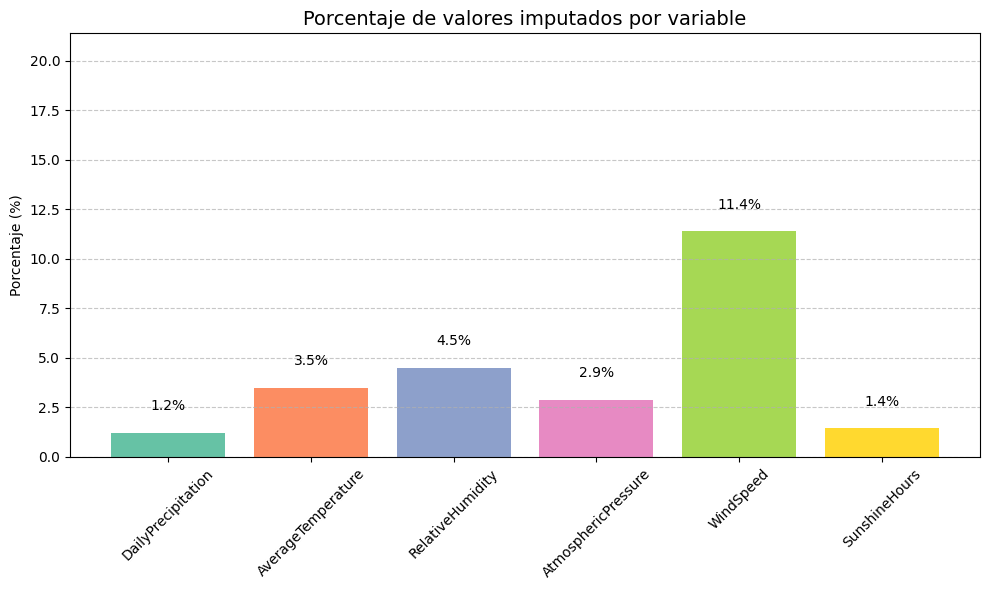

‚úÖ No hay valores faltantes en df_imputado. No se muestra el mapa de calor.


In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Aseg√∫rate de que estos est√©n activados en Colab
%matplotlib inline

# ================================
# 1. Calcular % de valores imputados por variable
# ================================
variables_evaluadas = ['DailyPrecipitation', 'AverageTemperature', 'RelativeHumidity',
                       'AtmosphericPressure', 'WindSpeed', 'SunshineHours']

porcentaje_imputado = {}
for var in variables_evaluadas:
    n_total = len(df_procesado)
    n_imputados = df_procesado[var].isna().sum()
    porcentaje_imputado[var] = (n_imputados / n_total) * 100

# ================================
# 2. Gr√°fico de barras del porcentaje de imputaci√≥n
# ================================
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2", len(variables_evaluadas))

bars = plt.bar(porcentaje_imputado.keys(), porcentaje_imputado.values(), color=colors)

# A√±adir etiquetas de porcentaje encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", 
             ha='center', va='bottom', fontsize=10)

plt.title("Porcentaje de valores imputados por variable", fontsize=14)
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)
plt.ylim(0, max(porcentaje_imputado.values()) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ================================
# 3. Mapa de calor de valores faltantes en df_imputado (si existen)
# ================================
if df_imputado.isna().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_imputado[variables_evaluadas].isna(), cbar=False, cmap='YlOrRd', yticklabels=False)
    plt.title("Mapa de calor de valores faltantes en df_imputado")
    plt.xlabel("Variables")
    plt.tight_layout()
    plt.show()
else:
    print("‚úÖ No hay valores faltantes en df_imputado. No se muestra el mapa de calor.")


In [149]:
# Guardar el DataFrame imputado como CSV
nombre_archivo = 'dataset_imputed_senamhi30Year.csv'
df_imputado.to_csv(nombre_archivo, index=True)

# Confirmar ruta de guardado
import os
print(f"Archivo guardado en: {os.path.abspath(nombre_archivo)}")


Archivo guardado en: /Users/edwinvalencia/Projects/Research/climate-variables-senamhi-augusto-weberbauer-cajamarca-1994-2024/dataset_imputed_senamhi30Year.csv


## Correspondencia entre variable ambiental, metodo de imputacion y fundamento teorico
| **Variable**            | **M√©todo Seleccionado** | **Justificaci√≥n Cient√≠fica**                                                                                                                                  |
| ----------------------- | ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **AtmosphericPressure** | SSA                     | Alta autocorrelaci√≥n y estacionalidad suave; SSA permite descomposici√≥n en componentes deterministas y ruido estructurado, ideal para variables barom√©tricas. |
| **AverageTemperature**  | Interpolaci√≥n STL       | Presenta estacionalidad anual fuerte y tendencia suave; STL permite separar estas componentes antes de la interpolaci√≥n.                                      |
| **DailyPrecipitation**  | SSA                     | SSA es adecuado para series discont√≠nuas con eventos extremos, ya que permite separar componentes dominantes sin asumir linealidad o continuidad.             |
| **RelativeHumidity**    | Interpolaci√≥n STL       | Alta estacionalidad anual y dependencia cruzada con temperatura; STL permite extracci√≥n de patrones c√≠clicos con precisi√≥n.                                   |
| **SunshineHours**       | SSA                     | Estacionalidad solar clara y alta variabilidad por nubosidad; SSA permite detectar y reconstruir patrones c√≠clicos mixtos.                                    |
| **WindSpeed**           | SSA                     | Alta variabilidad y autocorrelaci√≥n diaria; SSA ha demostrado buena capacidad para modelar series de viento y reconstrucci√≥n de huecos.                       |
